In [1]:
# all import statements 

import logging
logger = logging.getLogger()
logger.setLevel('WARNING')
from itertools import product
from functools import partial
from math import ceil

import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 20)
import networkx as nx
from networkx.algorithms import bipartite, community
from sklearn.preprocessing import minmax_scale
import community as louvain
import powerlaw

# importing own modules
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir) + "/pm"
sys.path.insert(0,parentdir)

import comment_thread as ct
import author_network as an
import multi_comment_thread as mct
from notebook_helper.process_data import *
from notebook_helper.access_funs import *
from plotting.threads import *
from plotting.network import *
from plotting.overview import *
from plotting.heatmap import *
from plotting.components import *

from AnalysisFunctions import *

sns.set_style('white')

%load_ext autoreload
%autoreload 2
%load_ext memory_profiler

In [2]:
%%memit
PM_FRAME = concatenate_project_dfs(
            process_pms(*range(1, 17)))
ALL_AUTHORS = set.union(*PM_FRAME['all threads', 'authors'].tolist())

<div id="div-comment-115409">
<div class="comment-author vcard">
<img alt="" class="avatar avatar-32" height="32" src="https://1.gravatar.com/avatar/a23b9df554f5ee2e60fdc13645e4c50d?s=32&amp;d=identicon&amp;r=G" width="32"/> <p>Jeff Kahn mentioned to me the beautiful “<a href="http://www.openproblemgarden.org/op/wide_partition_conjecture" rel="nofollow">Wide Partition Conjecture</a>” from the paper: T. Chow, C.K. Fan, M.X. Goemans and J. Vondrak, <cite>Wide Partitions, Latin Tableaux, and Rota’s Basis Conjecture</cite>, Advances in Applied Mathematics, 31, 334–358, 2003. <a href="http://math.mit.edu/~goemans/PAPERS/wide.pdf" rel="nofollow">pdf</a> . (I think this conjecture might be interesting also in the Tverberg context we mensioned above.) Perhaps, Tim, you can explain and motivate this conjecture and its relation to Rota’s conjecture?</p>
<div class="pd-rating" id="pd_rating_holder_133283_comm_115409"></div> <p><cite>Comment by <span class="fn"><a class="url" href="http://www.ma.h

Rota’s Basis Conjecture: Polymath 12, post 3
Rota‘s Basis Conjecture: Poltmath 12, post 3

peak memory: 2063.26 MiB, increment: 1899.41 MiB


# Perspectives on the Study of Polymath

## 1. Overview and Comparison

Several perspectives on the study of Polymath can be adopted. We can think of Polymath as a rich and detailed repository of mathematics in action, we can treat it as a specific (though unusual) example of science online, and we can think of it as an epistemic community that was consistuted throughout a succession of several collaborations (each, again, driven by a smaller sub-community). Our focus in the present study is on the final perspective. We describe and motivate this choice via a brief comparison of the three available perspectives, and their implications for how we ought to develop our analysis:

1. Polymath as a repository of mathematics in action.
    + This is the traditional perspective on Polymath within the mathematical practices community. It is a very natural perspective to adopt since Polymath does create insight to highly valuable data that normally remain hidden, and indeed, Polymath is at least partly motivated by the desire to make the inner practive visible to outsiders. Scholars of mathematical practice are just a highly specialised group of such outsiders.
    + From this perspective, the focus on the mathematical content (incuding the nature of arguments used by mathematicians -- see the work of Pease and Martin) of the collaboration is the focus of attention.
    + Several other features are less salient, including the social features and the role of ICT's in the collaboration.
    + Research in this perspective is usually focus and fine-grained; often focusing on smaller fragment of the broader enterprise. This implies that it leaves fewer room for general considerations about Polymath as a whole.
    + There is one important caveat to this type of approach: Can we really use Polymath as a source for the study of normal mathematical practices, or should we take the claim that it constitutes a "new kind of mathematics" seriously and therefore accept that we actually study a new practice.
    
    
2. Polymath as an example of science online.
    + This is the perspective adopted by scholars who study social and scientific practices online, and include Polymath within their overviews of scientific collaborations online. This is also true of Michael Nielsen, who was both an interested outsider (Nielsen 2010: 651) participant of the first Polymath-project (as well as Polymath 4 and 8), and included a detailed analysis in his "Reinventing Discovery" (Nielsen 2012).
    + There is some merit to this approach, as Polymath indeed conforms to the definitions of e-science and crowd-science, and undoubtedly shares some of the motivations of citizen-science. Yet, this cannot mask that the Polymath-projects remain a rather unusual example of science online, and that the study of Polymath within this framework might not do justice to the goals and achievement of Polymath. We include more detailed comparison and assessment of this perspective in a dedicated section below.
    
    
3. Polymath as an epistemic community.
    + This perspective is motivated by the fact that Polymath exhibits several features that appear to be distinctive of epistemic communities, and cannot addequately be accounted for from the other perspectives; including
        + the diversity of epistemic goals,
        + the fact that the research-agenda is set by the community:
            + potential questions are crowdsourced (see the initiative on MathOverflow),
            + projects typically start with a discussion-thread to gauge the interest before the project is officially launched, 
        + the fact that Polymath is not governed by a technical platform, but by a set of social norms or rules that govern the interactions.
    + In a minimal sense, this perspective is continuous with some of the earlier quantitative and network-theoretic analyses of Polymath; including Cranshaw & Kittur (2011), Sarvate *et al.* (2011), and Klouman *et al.* (2016).
    + There is also a more encompassing, social-epistemological, sense in which Polymath can be studied as an epistemic community. This may include the the question of how and whether the social norms that govern Polymath (i.e. the rules initially set during the first project), and especially the "small contribution rule" prevents the emergence of information-assymetries (Wagenknecht 2014) by asking for small and quick contributions, and discouraging longer periods of individual work.

## 2. Polymath as a Type of e-Research?


The Polymath-projects clearly fit the definition of e-research as research based on the use of digital tools and data—and the internet in particular—for the distributed and collaborative production of knowledge (Meyer and Schroeder 2015: Chapt. 1). Because it makes project-participation and access to intermediate inputs entirely open, it also qualifies as a type of crowd-science as conceived in Franzoni and Sauermann (2014) (see especially the taxonomy of knowledge production regimes Fig. 3). Finally, because it is in principle open to amateur mathematicians, it is also a kind of citizen-science. At the same time, Polymath remains in several respects an outlier, and this presumably accounts for its relative absence from the literature in this field (except for Nielsen (2012) and Franzoni and Sauermann (2014)). We review some of the reasons why Polymath is exceptional to situate it within the broader landscape:

**First,** unless we compare Polymath to paper and pencil mathematics, the Polymath-projects are by contemporary standards a fairly low-tech enterprise. It relies on off-the-shelf tools, namely freely available blogging-platforms (and to a lesser extent Wiki software), and became possible because of the availability of a LaTeX-plugin for WordPress.

This is different from most other types of e-research which typically rely on the development of dedicated tools for collaboration, and have in the case of Zooniverse even led to the creation of a re-usable tool or platform for online collaboration (https://www.zooniverse.org/ about). Polymath, by contrast, has become a re-usable idea that is primarily defined by the rules Gowers initially formulated (a recipe for collaboration that can be re-used or re-implemented), and is only to a lesser extent characterised by the specific technology it relies on (blogs, but also wikis). It’s appeal also remains limited to the formal sciences, with proposals to implement the kind of open collaboration Polymath initiated in AI (Zadrozny et al. 2015) and as a means to create research-opportunities for mathematics undergraduates (Parsley and Rusinko 2016).

**Second,** Polymath is clearly a small-scale enterprise when compared to many collaborative online projects. The largest Polymath-project (Polymath 8) attracted 180 participants, whereas the smaller projects (2 and 6) did not even reach 20 participants. Over a period of more than 9 years, 16 projects were initiated, and 598 distinct participants can be identified (see the detailed analysis below). By comparison, the 7 Zooniverse-projects reviewed in Sauermann and Franzoni (2015) reached between 3,186 and 28,828 participants in their first 180 days. This makes the description of Polymath as “massive online collaboration” somewhat excessive when it is purely judged by the numbers. This isn’t really surprising. The scale of collaboration within mathematics is generally smaller than in other sciences (Grossman 2002), and this substantially lowers the threshold for what we may consider large, or even massive, collaborations in mathematics. (One could also make the claim that there is a gap between Polymath-like “small science” and Zooniverse-like “Big Science”) More importantly, Polymath does not fit the mantra of citizen science that “anyone can be a researcher”. Even though participation is open to amateur mathematicians, and the choice for problems in combinatorics is at least partly motivated by the fact that knowledge of a small number of techniques can be sufficient to tackle open problems (e.g. Gowers 2000), active contribution is limited to those with the required expertise (the vertical axis of the taxonomy of crowd science in Figure 4 in Franzoni and Sauermann 2014). Polymath is meant to succeed in virtue of the fact that “different people know different things, so the knowledge that a large group can bring to bear on a problem is significantly greater than the knowledge that one or two individuals will have” (Gowers’ initial post), or by leveraging so-called micro-expertise (Nielsen 2012: Chapt. 4). One may therefore hesitate to see this type of approach as one that relies on the Wisdom of Crowds, and even doubt that there is a clear kind of epistemic contribution that the Polymath-projects are crowd-sourcing. At this point, we can only indicate that the intended individual contributions are neither complete proofs (cfr. the one correct answer that is typically the goal on the StackExchange sites) nor clearly identifiable or even just potential fragments of such a proof.

**Thirdly** (and not entirely disjoint from the question of what is being crowd-sourced or aggregated), in contrast to both Zooniverse-like endeavours and large-scale collaborations in the sciences, the problem-statement in Polymath-projects is clear and explicitly stated (as mentioned earlier, Polymath 2 is probably an exception), but individual tasks are rarely clearly individuated and tasks are never explicitly attributed to specific participants. Mainstream citizen-science is typically based on a huge amount of similar tasks that are explicitly attributed to participants in such a way that all tasks are not only completed, but are completed multiple times to allow for error-correction. In Watson and Floridi (2016) large number of participants and hard-coded error-correction strategies are explicitly related to the higher reliability of crowd-sourced science. Similarly, outside the scope of citizen-science, e-research and other large collaborative enterprises exhibit “a high degree of mutual dependence and task certainty” (Meyer and Schroeder 2015 building on work of Whitley 2000) that has no clear counterpart in the Polymath projects. This leads Franzoni and Sauermann (2014) to classify the Polymath projects as ill structured projects that are characterised by the absence of independent sub-tasks (the horizontal axis of their above- mentioned Figure 4).
**Add discussion of two-dimensional openness of crowd-science discussed in Franzoni & Saermann.**

The absence of hard-coded or other explicit error-correction procedures is equally important, and shouldn’t entirely be retraced to the absence of explicit sub-tasks (if the sub-tasks are unclear, the criteria for a successful micro-contribution are equally unclear). Instead, it should also be linked to the fact that the aggregation of contributions is itself distributed instead of centralised. Because all contributions or comments are accessible to anyone, they are in principle open to scrutiny by every participant as well. The absence of such procedures has two potential drawbacks: it leads to unclarity concerning whether and how error-correction takes place, and it makes it hard for individual participants to identify the current state of the project (i.e. what everyone should agree on).
The open-ended and informal character of Polymath-contributions makes it harder to understand and explain the precise sense in which Polymath-like projects lead to more reliable or potentially more successful models for mathematical inquiry. Specifically, the highlighted contrasts with other forms of e-research and crowd-sourced science reveal that epistemic success in Polymath can’t be retraced to good planning and reliable procedures. Other factors must instead be at play. As we move on, we will bring the role of direct interaction between participants, and the direct interaction between regular participant and participants that are leading mathematicians more into focus, and try to understand how this interaction can be epistemically beneficial. Whether these features can also be retraced to the specific nature of mathematical inquiry remains an open question.

Finally, as we will highlight later on, it would be a mistake to identify the epistemic value of Polymath-style collaborations to their potential to lead to mathematical results more quickly or efficiently. This is clearly emphasised by the importance that Gowers accords to making the intermediate products visible, and the related intent to reveal the inner workings of proof-search. If we take into account this alternative epistemic goal, it is immediately clear that a (hidden) centralised aggregation-procedure is of little use, and that we will need to develop different criteria to understand why and how Polymath is valuable and potentially successful.

**Fourth** it seems that Polymath diverges from mainstream e-research in at least two further respects:

1. despite its high pace, it can be understood as a form of slow science as well. This is made explicit in a comment of Gil Kalai:

	I think with a large collaboration of this kind we can aim not only for success in settling the problems (which is, of course, the central goal) but also for higher standards in explaining the proof, improving the argument, making sure it is locally correct and detailed (hyperlinks can even allow to give details that are necessary for some while obvious for others), and in the exposition level of the paper. Since everything is in the open there is no preasure to rush on these matters. (Gil Kalai, comment of March 15, 2009)
    
2. Polymath relies in only one of two ways on “unused epistemic resources”. It does so in the sense that it seeks to reap the benefits of micro-expertises that one would otherwise not have access to (this point was already highlighted by Nielsen), but it clearly does not in terms of epistemic efforts (or attention). The latter point is underscored by several participants. For instance: "The third surprise was how much time I devoted to this project." (Pace Nielsen in the “bounded gaps” paper) As well as the more obvious related remarks by project-leaders.
	

## 3. The Existing Literature

Prior scholarship devoted to the Polymath-projects can be organised in three broad disciplinary categories. A first category is dedicated to how specific information-technologies are used for collaboration, and can naturally by related to hypertext research (in particular the use of blogs and wiki’s) and humanistic computing. This category includes the above-mentioned work of Barany (2010), Cranshaw and Kittur (2011), Varshney (2012). The authors of these papers try to identify specific features of how collaboration in the Polymath-projects proceeds (e.g. remarks on noise-to-signal ratio by Barany, or the importance of leadership by Barany and Cranshaw & Kittur), propose criteria for success, and seek to evaluate to what extent collaboration in Polymath is successful. Unlike the present paper, the focus in this work is limited to the first Polymath-project. By contrast, it relies on social science methodology, and network-analysis in particular, as will be done in the present paper. More recently, Kloumann et al. (2016) has specifically investigated the contrast between research-level Polymath (projects 1 to 9) and mini-Polymath projects to investigate the patterns of collaboration and linguistic features that can be used to distinguish collaboration of hard problems from collaboration on problems that are known to be feasible.

A second category squarely belongs to the philosophy of mathematical practice. This includes work by Martin and Pease, with its emphasis on problem-solving and argumentation in mathematics (influenced by Lakatos, Pólya, and by work in formal argumentation) and with the stated intent to improve how large groups collaborate by making argumentative structures explicit, and focus on the use of ICT’s in mathematics that relates to the metaphor of social machines. Specifically, they analysed the third mini-Polymath project (see also below) and identified categories of comments and the mathematical concepts they relied on, and developed a typology of questions based on a sample of questions asked on MathOverflow (the research-mathematics site of StackExchange). Our own earlier work also belongs to this category. Finally, though not explicitly part of the philosophy of mathematical practice, Sarvate et al. (2011) have also drawn attention to the value of Polymath as a record that publicly exposes the intermediate stages of research and hence reveals how mathematical inquiry (and collaboration) proceeds, and to the possibility of applying network-science to study the development of these projects.

In the third category we find insider and popular science press reports on Polymath, which were the decisive element in how Polymath gained notoriety, and include in the first place Gowers and Nielsen’s opinion piece in Nature (Gowers and Nielsen 2009) and Nielsen’s “Reinventing Discovery: the New Era of Networked Science” in which Polymath featured prominently (Nielsen 2012). Additional inside-reports include Nielsen (2010) (though Nielsen describes himself as an “interested outsider”, p. 651 op. cit) and Gowers (2010) which covered the problem solved in the first Polymath-project, the views about collaboration in mathematics that motivated the project, and lessons learned from organising and guiding a large collaborative project. Finally, articles in New Scientist (Aron 2011), Scientific American (Castelvecchi 2010), The Mathematical Intelligencer (Nathanson 2010), a more recent short piece in Nature (Ball 2014), and many blog-posts complete this category.

The Polymath-projects are also addressed in the general literature on e-research and crowd- science. This was covered separately in the previous section.

# Background on the Content of Polymath (input from JP)

## Discussion of proposals ranked on MathOverflow

Summary of proposals (updated: August 10, 2016)

1) The LogRank conjecture. Proposed by Arul.
Het antwoord is zeker ja. De LogRank conjecture zoekt naar veelterm-bovengrenzen voor Booleaanse functies. Het vermoeden is ook gelijkwaardig met een probleem in grafentheorie, meer bepaald in verband met chromatische getallen. Dit valt duidelijk binnen de scope.

2) The circulant Hadamard matrix conjecture. Proposed by Richard Stanley.
Ook ja. Het gaat om rijen met +1 en -1 als elementen. Een circulaire shift is het doorschuiven van alle elementen en het laatste element wordt het eerste. Orthogonaal betekent dan weer dat het product van twee rijen 0 heeft als uitkomst. Typisch lineaire algebra maar, naarmate de rijen groeien in lengte, neemt de combinatorische complexiteit toe.

3) Finding combinatorial models for the Kronecker coefficients. Proposed by Per Alexandersson.
Dit is echt een typisch PolyMath probleem. De standaard aanpak voor het berekenen van Kronecker coëfficiënten maakt gebruik van allerhande complexe technieken maar “eenvoudiger” combinatorische technieken ontbreken. Op het eerste gezicht (volgens sommige commentatoren) een veel te lastig probleem voor PolyMath.

4) Eight lonely runners. Proposed by Mark Lewko.
Op en top PolyMath. Simulaties kunnen gemaakt worden. Het probleem is tot en met zeven lopers al opgelost maar daar voorbij zijn er nog geen resultaten. Dus er is een basis om van te vertrekken maar het is voldoende complex om niet meteen een oplossing te vinden. (Het geval van drie eenzame lopers zou best in Wiskunde & Onderwijs kunnen staan als “zoeker”).

5) A problem by Ruzsa: Finding the slowest possible exponential growth rate of a mapping f:N→Z that is not a polynomial and yet shares with (integer) polynomials the congruence-preserving property n−m∣f(n)−f(m). Proposed by Vesselin Dimitrov.
Iets minder duidelijk. Het gaat wel weer over bovengrenzen met de vraag of het mogelijk is om die verder te verbeteren (= scherper te maken) maar echt combinatorisch is dit niet. Het gaat bovendien om functies die niet door een veelterm kunnen uitgedrukt worden. Het is ook niet duidelijk of via Polymath interessante stappen voorwaarts mogen verwacht worden. Noot: dit lijkt aan de periferie te liggen op dezelfde manier als PM8 “anders” is.

6) Finding the Matrix Multiplication Exponent ω. (Running time of best algorithm for matrix multiplication.) Proposed by Ryan O'Donnell.
Een klassiek computationeel problem: hoe scherp kan het aantal stappen in het vermenigvuldigen van twee n x n matrices gesteld worden? Opnieuw niet echt combinatorisch maar wel uitgesproken computationeel. Bovendien is er al wat geweten over ω. Een terugkerend aspect is natuurlijk wel dat het probleem “empirisch” kan aangepakt worden door algoritmes uit te proberen. Toch een twijfelgeval zou ik zeggen.

7) The Moser Worm problem and Bellman's Lost in a forest problem. Proposed by Philip Gibbs.
Dit probleem brengt ons in de meetkunde. Opnieuw een computationeel probleem, geen onmiddellijke combinatorische aspecten. Al heel wat geweten over het probleem, onder andere, onder- en bovengrenzen. Ook dit zou ik als een twijfelgeval beschouwen.

8) Rational Simplex Conjecture ( by Cheeger and Simons). Proposed by Sasha Kolpakov.
Zou ik ook kenmerken als een randgeval. Er is wel een band met meetkunde maar tot op zekere hoogte lijkt het meer op “recreatieve” wiskunde (maar met voldoende wiskundige diepgang). Volgens de beschrijving is er wel een band met vlakvullingen met convexe vijfhoeken en dat brengt het dan toch weer dichter bij een combinatorisch probleem. Dus niet zeker wat het is.

9) Proving that for every integer m with |m| ≤ c(√n/2)n there is an n×n 0-1 matrix whose determinant equals m. Proposed by Gerhard Paseman.
Typevoorbeeld: matrices met alleen maar 0 en 1 als elementen en een combinatorische vraag naar de determinant. Plus zoeken naar onder- en bovengrenzen. Kan niet duidelijker. 

10) Proving or disproving that the Euler's constant is irrational. Proposed by Sylvain Julien.
Behalve het feit dat dit probleem deel uitmaakt van de “topuitdagingen” (en dus boven het hoofd van de meeste PolyMath deelnemers zal gaan), is niet meteen duidelijk op welke wijze dit combinatorisch of algebraïsch kan aangepakt worden. Het is ook niet duidelijk of er “experimenteel” werk kan geleverd worden. Maar, los van de moeilijkheidsgraad, zou ik het wel beschouwen als een typisch probleem voor PolyMath.

11) The Greedy Superstring Conjecture. Proposed by Laszlo Kozma.
Dit is op-en-top PolyMath. Overlappende sequensen uit een eindig alfabet samengesteld met de vraag of ze kunnen samengesteld worden tot één supersequens waarin ze allemaal voorkomen. De vraag is niet naar de mogelijkheid ervan (dat is triviaal) maar wel hoe goed een bepaald vrij evident algoritme het doet ten opzichte van de  optimale oplossing. Typisch voor PolyMath.

12) Understanding the behavior and structure of covering arrays. Proposed by Ryan.
Eveneens op-en-top PolyMath. Gegeven een alfabet (voor de eenvoud 0 en 1) en een aantal kolommen t, wat is het kleinste aantal rijen zodat in elk paar kolommen alle (geordende) combinaties van 0 en 1 voorkomen? Kan empirisch aangepakt worden, weinig is geweten, alleen “kleine” gevallen zijn beantwoord. Dus ook typisch.

13) The group isomorphism problem, proposed by Arul based on an early proposal by Lipton.
Dit is moeilijker om te beoordelen. Het is niet meteen duidelijk wat precies het vraagstuk is dat bedoeld wordt. Indien het algemene probleem wordt bedoeld – is er een methode om van twee verschillende representaties van groepen uit te maken of de groepen isomorf zijn? – dan is het antwoord negatief: dit probleem is onbeslisbaar. Maar, als het gaat om eindige groepen dan komen er vragen die combinatorisch van aard zijn en die vallen dan wel weer binnen het typische kader van PolyMath. Dus dat dan weer wel. Kortom een twijfelgeval (maar wel afhankelijk van wat precies bedoeld wordt).

14) Frankl's union closed set conjecture (Proposed by Dominic van der Zypen; Also one of the proposals by Gowers in this post). (Launched)
Polymath par excellence! Het is da nook “launched”. Het algemene vraagstuk (voor willekeurige n) is waanzinnig moeilijk maar speciale gevallen (voor elke n in principe) kunnen wel aangepakt worden. En er zijn bewijzen voor sommige van die gevallen. Het probleem zelf heeft te maken met lattices en hoe vaak een bepaald elementen van een verzameling voorkomt dus combinatorisch bij uitstek.

15) Komlos's conjecture in Discrepancy Theory. Proposed by Arul.
Opnieuw een vraagstuk rond matrices met elementen 1 en –1 en de vraag naar een bovengrens. Lijkt perfect te passen maar er is een reeks van verwante vraagstukken en het is niet meteen duidelijk welk vraagstuk juist wordt bedoeld. Maar er zitten ook combinatorische aspecten aan vast, wat nog een extra-argument is. 

16) (new) Rota's Basis Conjecture. Proposed by Timothy Chow.
Op de PolyMath website wordt een uitvoerige toelichting gegeven waarom dit probleem past in PolyMath. In “spirit” zeer verwant met probleem 12. Past dus zeer goed.

17) To show that 2n+5 composite for almost all positive integers n. (Might be too hard.) Proposed by me.
Ook typisch, wat mag verwacht worden, gezien “proposed by me”. Er is wel een gigantisch aantal problemen van dit type, namelijk van een verzameling getallen van een specifieke vorm aantonen dat ze ofwel (bijna) allemaal samengesteld ofwel een oneindig aantal priemgetallen bevatten. Ook computationeel aan te pakken natuurlijk.

18) To prove a remarkable combinatorial identity on certain Permanents. Proposed by me. Update, Aug 6, 2016: settled!
Mag uit het feit dat het problem opgelost is afgeleid worden dat het typisch PolyMath is? Misschien niet, maar dat geeft niet want dit is typisch een combinatorisch-algebraïsch probleem. Dus past perfect.

19) (NEW) Real world applications of large cardinals Proposed by Joseph van Name. There were a few more proposals in comments.
Dit lijkt op het eerste gezicht een wat rare toevoeging aan de lijst maar er staat tegenover dat onvolledigheidsresultaten in de rekenkunde meer en meer de vorm aannemen van combinatorische vraagstukken. Maar de probleemstelling is evenwel anders: gevraagd wordt om aan te tonen dat een resultaat onafhankelijk is van de rekenkunde en dat is niet typisch PolyMath. Dit is eigenlijk de enige cluster van vraagstukken die ik niet typisch tot PolyMath zou rekenen.

20) A project around a cluster of tiling problems. In particular: Is the Heech number bounded for polygonal monotiles? Is it decidable to determine if a single given polygonal tile can tile the plane monohedrally? Even for a single polyomino? Proposed by Joseph O'Rourke
Eigenlijk een verzameling van problemen maar vrij typisch voor PolyMath. Er valt experimenteel wel het een en ander te doen, er zijn al een redelijk aantal resultaten die inspirerend kunnen werken en “tiling” problemen komen ook bij andere problemen voor, zoals probleem 8 in deze lijst.


## About Polymath 16

Ik heb Polymath 16 wat van dichterbij bekeken en een paar dingen zijn mij duidelijk geworden. Ik lijst ze hier gewoon op, je ziet maar of je er iets kunt mee aanvangen:
 
1. Het oorspronkelijke probleem waarmee alles begonnen is, is vrij ingewikkeld en het is niet meteen duidelijk hoe je ermee moet omgaan. Dit is de vraag: met hoeveel kleuren kun je het Euclidische vlak kleuren zodanig dat er geen twee punten te vinden zijn op afstand 1 met dezelfde kleur. Je zit met de oneindigheid van het vlak, je mag kleuren zoals je wil en je moet kijken naar nog een oneindige verzameling, zijnde alle koppels van punten op afstand 1. Hoe pak je zoiets aan? (Het belang van dit probleem heeft te maken met het feit dat het behoort tot Ramsey theorie).
 
2. Maar dan komt het: er is al heel wat werk verzet om het probleem terug te brengen tot een probleem in grafentheorie. Daardoor wordt het probleem behandelbaar: zoek een eindige graaf met de eigenschap dat geen twee punten op afstand 1 dezelfde kleur krijgen. De wijze waarop het verband tussen beide wordt aangetoond heeft geen verder belang dus kan je beginnen prutsen met grafen en de rest vergeten.
 
3. Maar er is meer. Het aantal nodige kleuren was lange tijd begrensd onder door 4 en boven door 7. Recent is er een voorbeeld dat aantoont dat 4 niet kan. Dus het aantal kleuren is 5, 6 of 7. Polymath 16 stelt niet voor om meteen op zoek te gaan naar het unieke antwoord (waarvan de meeste wiskundigen blijkbaar denken dat het 7 is) omdat dat probleem al te lang openstaat en de moeilijkheidsgraad hoog wordt ingeschat. Daarom starten ze met een meer bescheiden opdracht: vereenvoudig het voorbeeld dat 4 niet kan (minder punten, minder verbindingen). Hieraan kan ongeveer elke wiskundige en programmeur deelnemen.

4. Stel dat er een eenvoudiger voorbeeld wordt gevonden dan moet dat zeker informatief zijn naar 5 en 6. Ik heb het nog niet zo in detail bekeken maar het zou kunnen dat een voorbeeld met 4 kan uitgebreid worden naar 5 en/of 6. Maar dat gezegd zijnde, lijkt de sprong van 3 (waar een vrij eenvoudige graaf volstaat) naar 4 weer gigantisch groot te zijn.

# Polymath as a Network : Facts and Insights from the Data

## 1. Description of the data

### 1.1. Origin of the data

The data from the Polymath-projects were obtained by scraping the discussion-threads of all the Polymath-projects on the following blogs:

+ Timothy Gowers' blog
+ Tererence Tao's blog
+ Gil Kalai's blog
+ The Polymath-blog
+ The Secret Blogging Seminar (only for some threads in Polymath 8)
+ The Short, Fat Matrices blog run by Dustin G. Mixon (only for some threads in Polymath 16)

Lists of all the discussion-threads were obtained from the [Polymath-wiki](http://michaelnielsen.org/polymath1/index.php?title=Main_Page).

### 1.2. Structure of the data

The structure of the data is related to:

+ **Projects**: there are 16 Polymath-projects, each devoted to one research-question.
+ **Threads**: each project consists of a series of **blog-posts** and associated **discussion-threads**. Blog-posts are authored by the leader of the project. This is typically only one person. Polymath 1 is the main exception with parallel threads hosted on separate blogs. There are two types of threads: research-threads and discussion-threads.
+ **Comments**: each discussion-thread is a succession of comments with:
    + an author (we refer to these as **participants** to distinguish them from the authors of the blog-posts), and
    + a content, with a given length or wordcount.
    + The comments are temporally ordered by their **timestamps**, and
    + organised in a tree-like structure, with:
        + level $1$ comments as child-nodes of the blog-post, and
        + level $n+1$ comments (for $n>1$) as child-nodes of level $n$ comments.
        
In the example-figure below, the tree-like structure as well as the temporal ordering is depicted. The color of the nodes corresponds to the identity or at least the supplied name of the authors of the comments.

#### Example of thread-structure

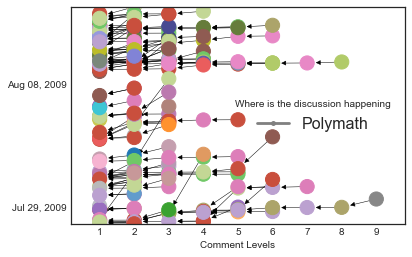

In [3]:
PM4_FOCUS={'project': "Polymath 4", 'thread_type': "research threads", 'stage':1}
plot_discussion_tree(PM_FRAME, **PM4_FOCUS, show=True, remove_title=True)

Where $n>1$, the child-parent relation between comments is an explicit *reply-to* relation between the author of the child-comment and the author of the parent-comment, while the parent-child relation between these comments is an implicit *has reached* relation between the author of the parent-comment and the author of the child-comment. We shall refer to the authors of comments as *participants*.

Participants can be identified within and across threads and projects by their supplied author-name. All author-names where compared for string-similarity. Similar names that could be retraced to the same commenter were re-identified (see list in appendix), but ambiguous cases like slight variants of the same name without surname where kept distinct. Various versions of "anonymous" are present in the data. Comments authored by an anonymous participant are not attributed to a single participant, but are instead removed from most detailed analyses.

There is one exception to this rule: we noticed an exceptionally high number of anonymous comments in Polymath 15 (more than in all other projects together), and decided that there were sufficient indications to identify these contributions as coming from a single participant we renamed as *PM15 Anonymous* and treated as a normal partcipant.

This structure captures the quantitative and relational information that can be obtained by scraping all the posts and discussion-threads.

Textual data can be obtained from the content of the posts and comments, but is left out of the analysis. This isn't the focus here, but it does avoid a further complication related to the fact that all *LaTeX*-content is rendered as figures and is hence unavailable for scraping. This makes bulk of the mathematical content practically unavailable for automated processing.

### 1.3. Relational and Scalar Data

The study Polymath as a social network, and therefore place most emphasis on the analysis of relational data.

We can distinguish between different types of relational data, namely:

1. Relations that encode direct interactions, and
2. Relations that encode affiliations.

    Relations derived from direct interactions are only defined between entities of the same kind. In our case, mainly participants. Affiliation-networks are, by contrast, bi-partitite networks; where relations are only defined between entities of different kinds.
    
    When we study the Polymath-community as a whole, we consider affiliations between participants and projects, and between participants and discusssion-threads. When we study the communities associated with a single project, we consider affiliations between participants and threads, and between participants and episodes of intense interaction. Such episodes are identified by means of a clustering-algorithm.

    Given an affiliation-network, we can construct a so-called projected-graph that connects entities of one kind based on their joint affiliations. This gives rise to a third type of (derived) relational data:

3. Relations that encode joint affiliations.

    It is thus natural to post connections between participants based on their joint participation to projects, but the converse makes sense as well: we can connect projects based on the participants they have in common.

When we describe the Polymath-community as a whole, we consider coarse-grained affiliations. In such cases the joint-affiliation relations we study are rather loose, and do not even indicate that participants actually interacted. When we describe specific project-communities, joint-affiliations to episodes do indicate actual interactions.

Overall, we have found that the analysis of joint-affiliations to episodes is a more reliable guide to the structure of interactions within Polymath than the analysis of direct interactions based on reply-to relations. We describe and motivate this procedure in more detail in §6.

#### A Remark on Relational vs Scalar Data 

Several fundamental metrics that are used to characterise relational data should be used with some caution in the present context, as they provide no insight beyond the analysis of the more basic scalar data used to deduce the existence of relations between participants and projects or threads. It is therefore useful to, first, make these connections explicit, and, second, to start our analysis with a direct exploration of these scalar data.

When we consider affiliations between participants and projects, and set the strength of an affiliation (the weight we assign to the edge) to a project to be the number of comments contributed by a participant to a project, then:

1. The degree of each participant in this bi-partite network is: 
    
    + degrees of unweighted networks: the number of projects
    + degrees of weighted networks: the number of comments

of that participant.
    
2. The degree of each project in this bi-partite network is:

    + degrees of unweighted networks: the number of participants
    + degrees of weighted networks: the number of comments

in that project.

## 2. General Overview

We can begin by counting the comments and the participants in each project to get a first idea of the size of each project and of the size of the global community.

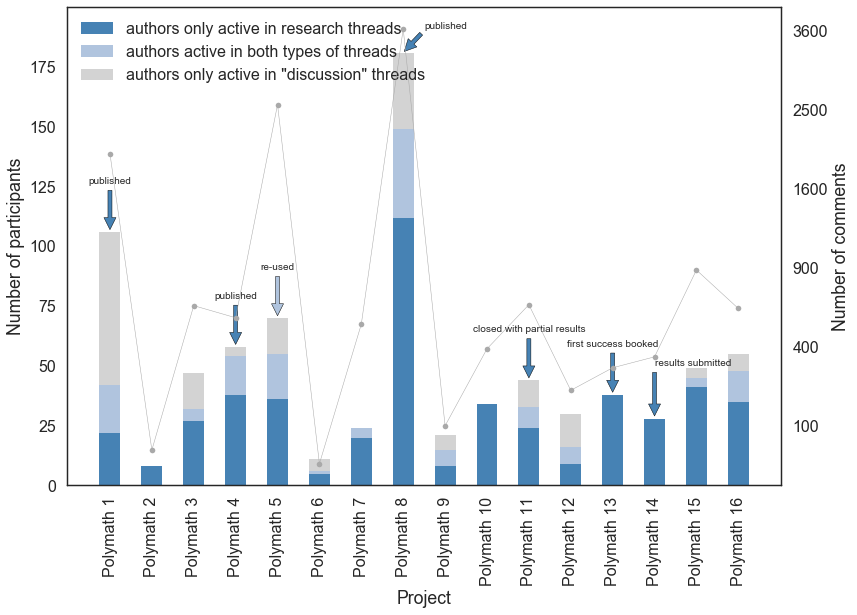

In [4]:
participants, comments = plot_overview(PM_FRAME)

There have been 16 research-level Polymath-projects over the past 9 years (we do not consider the Mini-Polymath projects that were dedicated to Maths Olympiad-finals problems). The first one was initiated early in 2009. The last two ones were initiated early in 2016 and are at present still active. From 2009 to 2010 the first 5 projects were initiated; in 2017 and 2018 the 5 most recent projects were initiated. The intermediate 6-year period led to fewer projects, but is dominated by the (to this data) largest Polymath-project. 

Polymath-projects have between 8 (Polymath 2) and 181 participants (Polymath 8). The shortest project (Polymath 6) only had 27 comments, whereas the largest project (Polymath 8) had 3633.

Across all projects, 598 (599 if "anonymous" is included) distinct participants were identified, and more than 13.000 comments were posted.

The distribution of the number comments per participant appears to be extremely unequal. Across all project, the mean number of comments per participants is only 22, only 25 participants (less than 5%) commented more than 100 times. Most notably, over 40% of all participants commented only once, and the two top contributors (Timothy Gowers and Terence Tao) wrote more than 25% of all comments.

Data from the latest projects suggests, however, that the relative influence of Gowers and Tao decreases.

In [5]:
counting_all_comments = PM_FRAME["all threads", "comment_counter"].apply(Series).sum()
counting_all_comments = counting_all_comments.drop("Anonymous")

counting_res_comments = PM_FRAME["research threads", "comment_counter"].dropna().apply(Series).sum()
counting_res_comments = counting_res_comments.drop("Anonymous")

counting_dis_comments = PM_FRAME["discussion threads", "comment_counter"].dropna().apply(Series).sum()
counting_dis_comments = counting_dis_comments.drop("Anonymous")

We plot Lorenz-curves and compute Gini-indices to quantify how unequal the Polymath projects are.

$Gini = \frac{2 \sum_i^n i ~\times~ y_i}{n \sum_i^n y_i} - \frac{n + 1}{n}$
with $[y_1, \ldots, y_n]$ a sorted vector of $y_i$'s.

A high value means that a small proportion of participants is responsible for a high proportion of contributions.

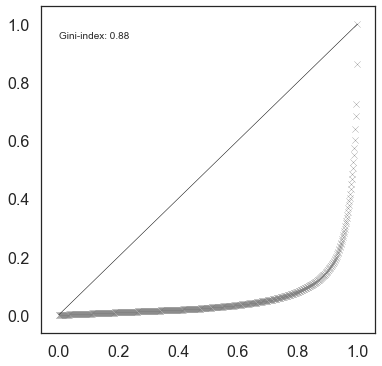

In [6]:
global_ineq = ineq(counting_all_comments)

_, axes = plt.subplots(figsize=[6,6])
global_ineq.plot_lorenz(axes)

The Gini-index for all comments across all projects is 0.87. This result is comparable to those computed by Sauermann & Franzoni (2015) for 7 Zooniverse-projects (See Table S2 of the [supplementary material](http://www.pnas.org/content/pnas/suppl/2015/01/02/1408907112.DCSupplemental/pnas.201408907SI.pdf)), where a Gini-index of 0.85 is given as an average across all projects. In that sense, the value we find here is very high, but not exceptional.

When we separate all projects, we find more variation. In general, larger projects tend to be more unequal in the sense that attracting more participants primarily means attracting more less active participants. This is to be expected since as projects go on, the relative impact of the most prominent participants increases. (Below we digg deeper into the mechanism that produces these types of imbalance)

In the specific context of Polymath, extreme inequality raises two questions that might not arise relative to other forms of crowd-science:

1. The Polymath-projects are meant to implement genuine collaborative problem-solving, and this is something that can be affected by how the cognitive labour is distributed. This is not the case in Zooniverse-like projects where a single type of task is distributed among the participants (distributed coding or distributed sub-problems; see Franzoni & Sauermann 2014), and the results are aggregated by a central entity. Clearly, where every task can be accomplished by any participant, the distribution of the effort only reveals something about the available resources, but not about the structure of the interaction. In the case of Polymath, the distribution of the congitive labour also caries information about the underlying patterns of interaction. Not so active participants are unlikely to interact, whereas highly active participants will probably interact with many participants.
2. One of the advertised goals of the Polymath-projects is to develop a new form of "open collaboration" in mathematics. As such, if most cognitive labour is done by few participants, this may suggest that the community is less "open" than it aspires to be. 

We should therefore, minimally, try to gain a better understanding of the inequality, by considering how it emerges, and what it may tell us about the role of prominent participants. We believe that the adoption of a network-perspective is a fruitful approach.

## 3. The Distribution of Comments

The distribution of comments can be described by a heavy-tailed distribution. We found that the best fit for the distribution of the number of comments per author is a truncated power_law (red line in the plot). The data is sufficient to rule out an exponential distribution (not shown), but we cannot exclude alternative heavy-tailed distributions like a stretched exponential or lognormal distribution (the two green lines). 

/Users/patrickallo/anaconda3/lib/python3.5/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/patrickallo/anaconda3/lib/python3.5/site-packages/powerlaw.py:692: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Assuming nested distributions


power_law vs exponential: (5.6092290523221804, 2.0322989999977917e-08)
power_law vs truncated power_law: (-2.7379236635073787, 0.0014453004762876587)
truncated power_law vs exponential: (5.8561452151370235, 4.7373403147820532e-09)
truncated power_law vs stretched exponential: (1.097244994921992, 0.27253430877806595)
truncated power_law vs lognormal: (1.2890589550794538, 0.19737759147665646)



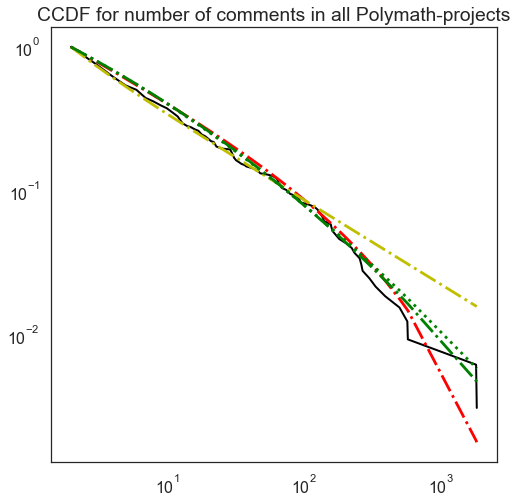

In [7]:
fit = powerlaw.Fit(counting_all_comments, discrete=True, xmin=2.0)
print("power_law vs exponential:", fit.distribution_compare('power_law', 'exponential', normalized_ratio=True))
print("power_law vs truncated power_law:", fit.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True))
print("truncated power_law vs exponential:", fit.distribution_compare('truncated_power_law', 'exponential', normalized_ratio=True))
print("truncated power_law vs stretched exponential:", fit.distribution_compare('truncated_power_law', 'stretched_exponential', normalized_ratio=True))
print("truncated power_law vs lognormal:", fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio=True), end="\n\n")
_, axes = plt.subplots(figsize=(8,8))
fit.plot_ccdf(color='k', linewidth=2, ax=axes)
fit.truncated_power_law.plot_ccdf(color='r', linestyle='-.', ax=axes)
fit.power_law.plot_ccdf(color='y', linestyle='-.', ax=axes)
fit.stretched_exponential.plot_ccdf(color='g', linestyle='-.', ax=axes)
fit.lognormal.plot_ccdf(color='g', linestyle=':', ax=axes)
axes.set_title("CCDF for number of comments in all Polymath-projects");

At the level of individual projects the data are insufficient for a similar analysis.

Two aspects of this distribution should be highlighted:

First, the distribution we see should not be seen as the outcome of a *rich gets richer* dynamics. High values are the result of a substantial effort. This is obvious in this context, where we only look at the number of comments, but it is crucial to keep this lesson in mind when we study relational data: being affiliated to many projects, threads, and episodes requires a substantial effort; consequently, joint affiliations with many participants requires the same effort.

Second, by looking closer at both numbers of comments and numbers of affiliations, we can understand how this distribution emerges. The key insight here is the fact that participants who contribute just a few comments are almost exclusively participants who only took part in one project, whereas participants who contribute more comments are also more likely to be returning participants. As a consequence, the growth of the Polymath-community is such that:

+ The number of comments by the most active participants increases, whereas
+ The number of participants with very few comments increases.

The plots below characterise this double imbalance by relating number of comments to number of project and thread-affiliations.

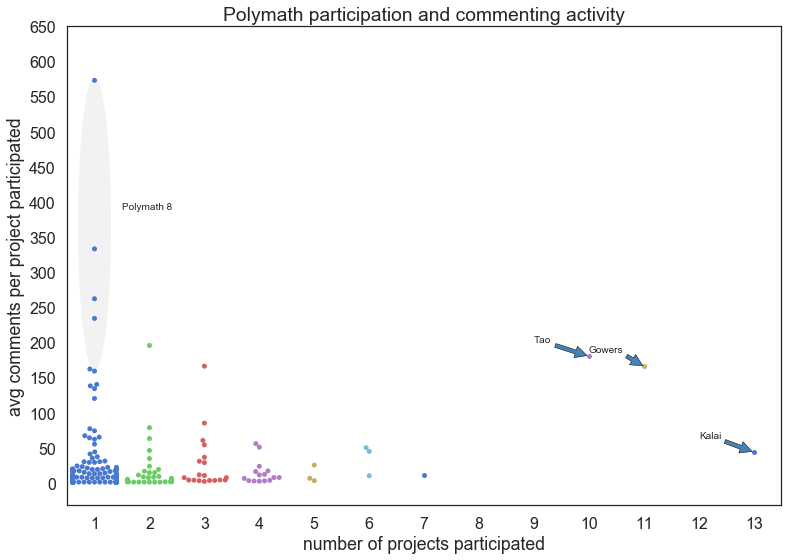

In [8]:
project_data = plot_scatter_author_activity_projects(PM_FRAME, ALL_AUTHORS)

In addition to the already highlighted fact that a very small fraction of the participants is responsible for the majority of the contributions, we also note that only few participants become long-term contributors. Even more, 506 of the 597 participants contributed to only one project, and as few as 10 contributed to at least five projects. We will henceforth refer to the 506 single-project participants as *peripheral* participants, and to the remaining 91 as *core* participants.

A similar pattern, but without the highly marked presence of highly active single-project contributors to Polymath 8, is found at the level of thread-affiliations. 

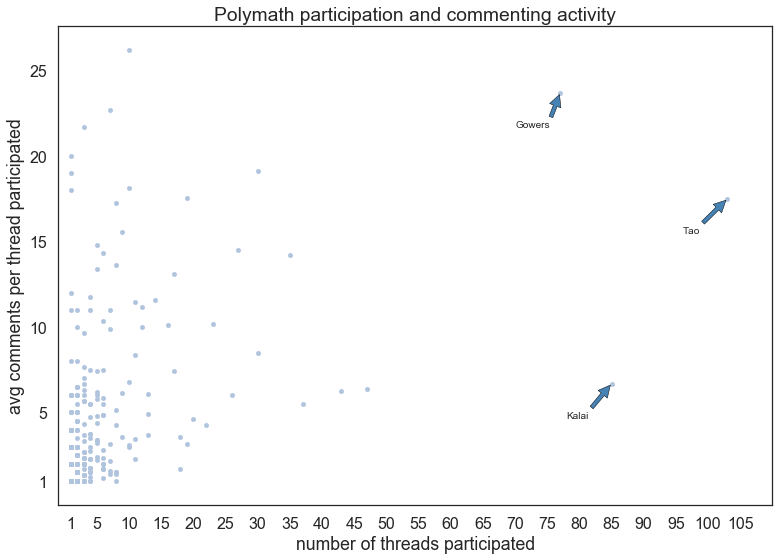

In [9]:
thread_data, detailed_thread_data = plot_scatter_author_activity_threads(PM_FRAME, ALL_AUTHORS)

We find that 90% of all participants participated to at most 6 threads, and contributed at most 6 comments to each thread they participated.

The plot below shows, for three stages (after Polymath 7, 8, and 9) the average number of comments in the preceding 7 projects (ignoring projects without participation) against the frequency of returning in one of the next projects.

/Users/patrickallo/anaconda3/lib/python3.5/site-packages/seaborn/regression.py:277: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


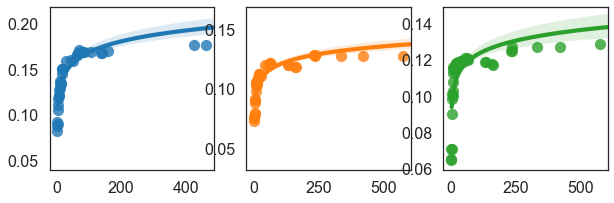

In [12]:
n_rows=7

distr_data = get_last(
    PM_FRAME, "all threads")[0][
    "all threads", "comment_counter (accumulated)"].apply(Series)
distr_data.index = distr_data.index.droplevel(1)

_, axes = plt.subplots(1,3, figsize=(10,3))

for project, ax in enumerate(axes.flatten(), start=n_rows):
    if project+n_rows==17:
        break
    ns = unique_means(project, distr_data)
    future = []

    for n in ns:
        has_n = atmost_n_at_i(project, distr_data, n, n_rows=n_rows)
        projects = proportion_participated_after_i(project, distr_data, has_n.index, n_rows=n_rows)
        future.append(projects)
    sns.regplot(np.array(ns), np.array(future), ax=ax, logx=True)

## 4. Project-affiliations

We start our exploration of affiliation-data by looking at the project-affiliations of the 91 core-participants.

In [13]:
# assembling info needed to create the heatmaps (all authors who participated to 2 projects) Already used below
author_project_all, indices_all, select_2_all, title_all = project_participation_evolution(
    PM_FRAME, ALL_AUTHORS, research_only=False)

author_project_res, indices_res, select_2_res, title_res = project_participation_evolution(
    PM_FRAME, ALL_AUTHORS, research_only=True)

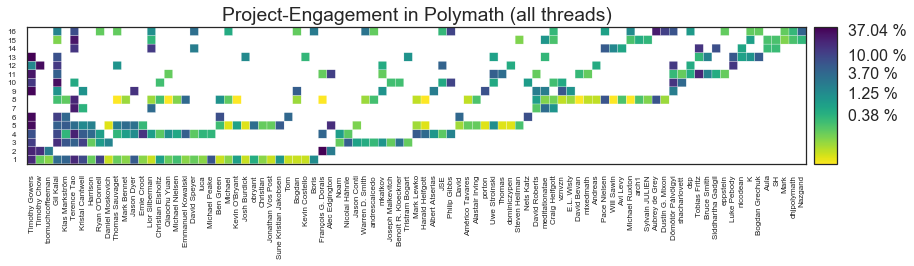

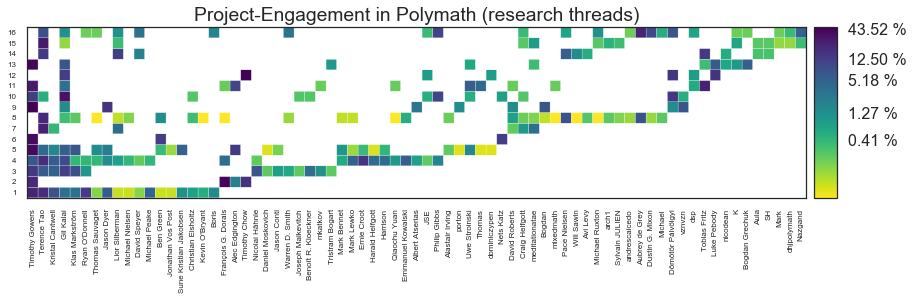

In [14]:
authors_2_all = [author for author, bool in select_2_all.items() if bool]
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_all,
                              thread_level=False, cluster_projects=False,
                              cluster_authors=False,
                              binary=False,
                              scale_data=True),
             log=True)

authors_2_res = [author for author, bool in select_2_res.items() if bool]
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=False,
                              cluster_authors=False,
                              binary=False,
                              scale_data=True),
             log=True)

A first thing to note is that while the community of core-participants was formed in the early stages of Polymath, this does not prevent newer participants from becoming highly active participants.

We also note that with every project new core participants emerge. The table below summarises the proportions of new and previously active participants for each project.

In [15]:
join_data = get_last(PM_FRAME, "all threads")[0]['all threads', 'comment_counter (accumulated)'].apply(Series)
join_data.index = join_data.index.droplevel(1)
join_data = join_data.drop("Anonymous", axis=1)
join_data = join_data.apply(lambda x: x.first_valid_index(), axis=0).value_counts().reindex(["Polymath {}".format(i) for i in range(1, 17)])

periphery_and_new = DataFrame({"total participants": author_project_all.sum(),
                               "returning": (author_project_all.sum() - join_data),
                               "new core": (join_data - author_project_all[~select_2_all].sum()),
                               "new peripheral": author_project_all[~select_2_all].sum()},
                             columns = ["total participants", "returning", "new core", "new peripheral"])

periphery_and_new = periphery_and_new.assign(a_returning_rel = lambda x: round(x["returning"] / x["total participants"], 2),
                                             b_new_core_rel = lambda x: round(x["new core"] / x["total participants"], 2),
                                             c_new_periph_rel = lambda x: round(x["new peripheral"] / x["total participants"], 2))

new_cols = pd.MultiIndex.from_tuples(list(product(
    ['Absolute Values', 'Relative Values'],
    ['Total Participants', "Returning", "New core", "New Peripheral"])))

new_cols = new_cols.drop([("Relative Values", "Total Participants")])

periphery_and_new.columns = new_cols

periphery_and_new

Absolute Values                                    \
            Total Participants Returning New core New Peripheral   
Project                                                            
Polymath 1                 105         0       34             71   
Polymath 2                   8         3        2              3   
Polymath 3                  46         8        9             29   
Polymath 4                  57        22        5             30   
Polymath 5                  69        23        8             38   
Polymath 6                  11         6        1              4   
Polymath 7                  23         3        3             17   
Polymath 8                 180        24       13            143   
Polymath 9                  20        12        1              7   
Polymath 10                 33        13        1             19   
Polymath 11                 43        13        5             25   
Polymath 12                 29        10        1             18   
Polymath 13                 38        10        3             25   
Polymath 14                 27         9        2             16   
Polymath 15                 49        12        3             34   
Polymath 16                 54        26        0             28   

            Relative Values                          
                  Returning New core New Peripheral  
Project                                              
Polymath 1             0.00     0.32           0.68  
Polymath 2             0.38     0.25           0.38  
Polymath 3             0.17     0.20           0.63  
Polymath 4             0.39     0.09           0.53  
Polymath 5             0.33     0.12           0.55  
Polymath 6             0.55     0.09           0.36  
Polymath 7             0.13     0.13           0.74  
Polymath 8             0.13     0.07           0.79  
Polymath 9             0.60     0.05           0.35  
Polymath 10            0.39     0.03           0.58  
Polymath 11            0.30     0.12           0.58  
Polymath 12            0.34     0.03           0.62  
Polymath 13            0.26     0.08           0.66  
Polymath 14            0.33     0.07           0.59  
Polymath 15            0.24     0.06           0.69  
Polymath 16            0.48     0.00           0.52

To visually inspect the entirety of project-affiliations, it is more convenient to draw the network itself. This is a weighted network where the weight associated with each edge corresponds to the (absolute) number of comments contributed to a given project by a given participant. In the figures included in the next section, peripheral participants are coloured in relative to the single project they belong to; a different colour is used for core participants. For the affiliation-network, the size of the project-nodes indicates the number of comment in each project. 

In [16]:
#this collects project-affiliation data from the comment-counters in the big PM_FRAME
project_affiliation_data = get_last(PM_FRAME, "all threads")[0]["all threads"]['comment_counter (accumulated)'].apply(Series)
project_affiliation_data.index = project_affiliation_data.index.droplevel(1)
project_affiliation_data = project_affiliation_data.T
project_affiliation_data = project_affiliation_data.fillna(0)
project_affiliation_data.drop("Anonymous", axis="index", inplace=True)

In [17]:
Affil_network = nx.Graph()
Affil_network.add_nodes_from(project_affiliation_data.index, bipartite=0)
Affil_network.add_nodes_from(project_affiliation_data.columns, bipartite=1)

for author in project_affiliation_data.index:
    affiliations = project_affiliation_data.loc[author]
    Affil_network.add_weighted_edges_from(
        [(author, project, affiliations.loc[project]) for project in affiliations.index
    if affiliations.loc[project] != 0])

## 5. Joint Affiliations

Our goal in this section is to derive co-affiliation networks. We will do this on the basis of the participant-project affiliations as well as on the basis of the participant-thread affiliations (we do not study these affiliations directly, but only through the co-affiliation network we van generate from it).

### 5.1. Methodology

The most common approach taken for generating co-affiliation networks is to generate a weighted network from an un-weighted bi-partite network. To take the strength of affiliations into account, we adopt a more elaborate approach based on the following principles:

1. For every pair of participants $l$ and $k$ , let the vectors of weights $w_l = [w^1_l, \ldots, w^{16}_l]$, $w_k = [w^1_k, \ldots, w^{16}_k]$ correspond to the number of comments contributed to each project. This corresponds to a list of the weights between $l$ (resp. $k$) and the neighbours of $l$ ($k$) in the project-affiliation network; with zero's filled in to have fixed-lenght vectors and ensuring that the $n$th element of $w_l$ is the number of comments of $l$ contributed to the $n$th Polymath project. The sum of a vector $w_l$ corresponds to the weighted degree of $l$ in the project-affiliation network.

2. Let the vector $w = [\hat{w_1}, \ldots, \hat{w_{16}}]$ be the average number of comments contributed to each project.

3. We define the strength or weight of the tie beteween $l$ and $k$ as $\sum_{i=1}^{16} \frac{w^i_l \times w^i_k}{\hat{w^i}}$.

By multiplying weights, we ensure that the tie between two participants with few contributions is weak, and becomes stronger as either or both has more contributions. The normalizing factor ensures that the weights remain within the range of the original weights (based on absolute counts of comments). The results capture the idea that two highly active participants of a given project are more likely to have interacted more directly.

In general, the choice for absolute values (edge-weights as number of comments rather than project-relative proportions of comments) implies that stronger ties can in principle be created during larger projects.

Despite this more elaborate approach, the relative scarcity of well-established methods for studying weighted networks leads us to often disregard weights in our analysis.

In addition, attempts to find sub-communities within the joint-affiliation networks turn out to be mostly inconclusive and leading to very unstable results. Even when limited to core participants, the only stable result, namely the presence of a large community around Gowers and one around Tao, the scope of these communities remains sensitive to project vs thread-based joint affiliations.

In [18]:
# creating the thread-affiliation network-data and network (not to be used directly)
thread_affiliations = DataFrame([Series(counter) for counter in PM_FRAME["all threads"]["comment_counter"]])

thread_affiliations = thread_affiliations.dropna(axis="index", thresh=2)
thread_affiliations = thread_affiliations.dropna(axis="columns", thresh=1).fillna(0)

thread_affiliations = thread_affiliations.T

thread_affiliations.drop("Anonymous", axis="index", inplace=True)

TAffil_network = nx.Graph()
TAffil_network.add_nodes_from(thread_affiliations.index, bipartite=0)
TAffil_network.add_nodes_from(thread_affiliations.columns, bipartite=1)

for author in thread_affiliations.index:
    affiliations = thread_affiliations.loc[author]
    TAffil_network.add_weighted_edges_from(
        [(author, thread, affiliations.loc[thread]) for thread in affiliations.index
    if affiliations.loc[thread] != 0])

In [19]:
# functions for projected networks. Intended for use with absolute weights.
def custom_weight_fun(G, u, v, weight="weight", affiliations_list=None, normalizer=None):
    u_weights = np.array([G[u].get(item, dict()).get(weight, 0) for item in affiliations_list])
    v_weights = np.array([G[v].get(item, dict()).get(weight, 0) for item in affiliations_list])
    return ((u_weights * v_weights) / normalizer).sum()

# project-affils
project_list = ["Polymath {}".format(i) for i in range(1, 17)]
project_normalizer = (Series({i: j for (i, j) in Affil_network.degree(weight="weight") if i in project_list},
       index=project_list) / Series({i: j for (i, j) in Affil_network.degree(weight=None) if i in project_list},
       index=project_list)).values
project_weight_fun = partial(custom_weight_fun, affiliations_list=project_list, normalizer=project_normalizer)

# thread-affils
thread_list = [node for node in TAffil_network.nodes if isinstance(node, int)]
thread_normalizer = (Series({i: j for (i, j) in TAffil_network.degree(weight="weight") if i in thread_list},
       index=thread_list) / Series({i: j for (i, j) in TAffil_network.degree(weight=None) if i in thread_list},
       index=thread_list)).values
thread_weight_fun = partial(custom_weight_fun, affiliations_list=thread_list, normalizer=thread_normalizer)

In [20]:
%%time
participant_network = bipartite.generic_weighted_projected_graph(Affil_network,
                                           author_project_all.index, weight_function=project_weight_fun)

# adding inverted weights to participant-network from project-affils for use with betweenness
inverted_weights = dict()

for (i, j, attributes) in participant_network.edges(data=True):
    inverted_weights[(i, j)] = 1/attributes["weight"]

nx.set_edge_attributes(participant_network, inverted_weights, 'inverted_weight')

CPU times: user 14 s, sys: 153 ms, total: 14.2 s
Wall time: 14.6 s


In [21]:
%%time
participant_network_t = bipartite.generic_weighted_projected_graph(TAffil_network,
                                           thread_affiliations.index, weight_function=thread_weight_fun)

# adding inverted weights to participant-network from thread-affils for use with betweenness
inverted_weights = dict()

for (i, j, attributes) in participant_network_t.edges(data=True):
    inverted_weights[(i, j)] = 1/attributes["weight"]

nx.set_edge_attributes(participant_network_t, inverted_weights, 'inverted_weight')

CPU times: user 34.4 s, sys: 421 ms, total: 34.8 s
Wall time: 36.6 s


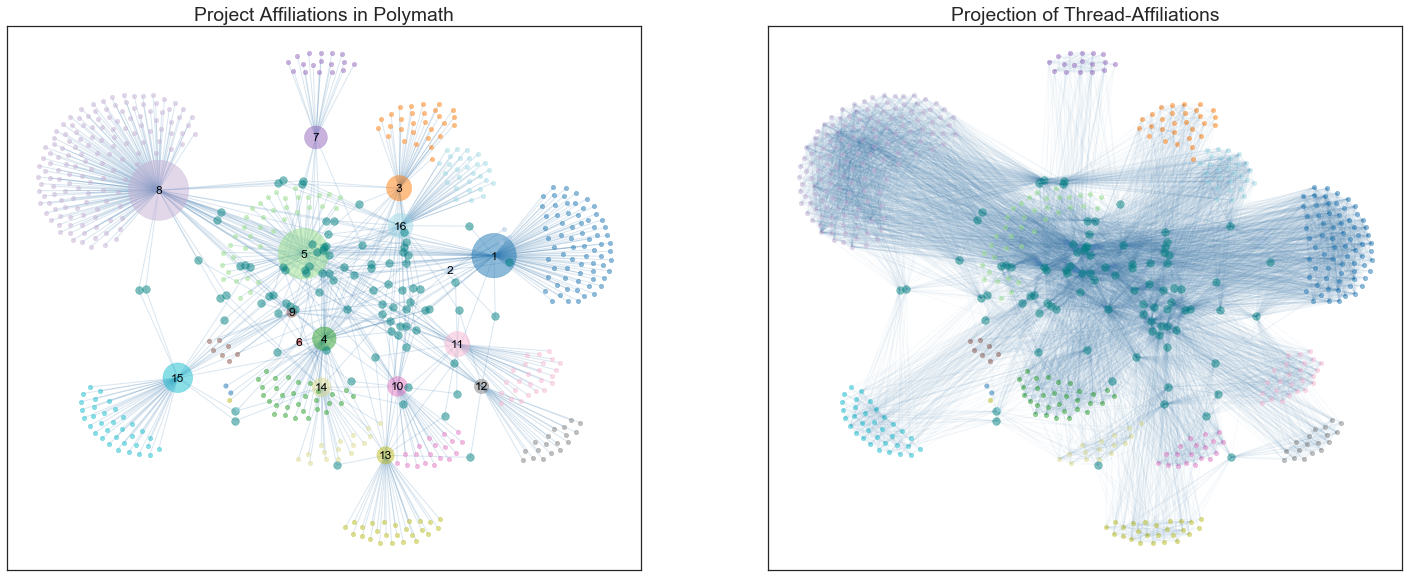

In [22]:
_, (axes1, axes2) = plt.subplots(1,2, figsize=(25, 10))

axes1.xaxis.set_ticks([])
axes1.yaxis.set_ticks([])
axes1.set_title("Project Affiliations in Polymath")

# We compute the positions by ignoring the weights
positions = nx.spring_layout(Affil_network, weight=None, k=None, scale=5, random_state=1)

colors = [18 if not node.startswith("Polymath") else node.split()[-1]
          for node in Affil_network.nodes()]

#project_colors = [int(node.split()[-1]) for node in author_project_all.columns]
cmap = matplotlib.cm.get_cmap('tab20')
project_colors = [cmap(i) for i in np.linspace(0, 1, 16)]

project_sizes = {"by_participants": [author_project_all[project].sum()*15 for project in author_project_all.columns],
                 "by_comments": get_last(PM_FRAME, "all threads")[0]["all threads", "number of comments (accumulated)"].tolist()}
                 

# draw project_nodes
nx.draw_networkx_nodes(Affil_network, pos=positions,
                       nodelist=author_project_all.columns.tolist(),
                       node_color=project_colors, alpha=.5,
                       node_size=project_sizes["by_comments"],
                       ax=axes1)

# draw participant_nodes
# "core"
nx.draw_networkx_nodes(Affil_network, pos=positions,
                       nodelist=author_project_all.loc[select_2_all].index.tolist(),
                       node_color="teal", alpha=.5,
                       node_size=60,
                       ax=axes1)

#"periphery"
for i, project in [(i, "Polymath {}".format(i)) for i in range(1, 17)]:
    project_participants = author_project_all.loc[~select_2_all].loc[author_project_all[project] == 1].index.tolist()
    nx.draw_networkx_nodes(Affil_network, pos=positions,
                       nodelist=project_participants,
                       node_color=project_colors[i-1], cmap="tab20", alpha=.5,
                       node_size=20,
                       ax=axes1)

# draw edges
nx.draw_networkx_edges(Affil_network, pos=positions,
                       edge_color="steelblue", alpha=0.2,
                       ax=axes1)

# draw labels
nx.draw_networkx_labels(Affil_network, pos=positions,
                        labels={project: project.split()[-1] for project in author_project_all.columns},
                        fontsize=14,
                        ax=axes1);




axes2.xaxis.set_ticks([])
axes2.yaxis.set_ticks([])
axes2.set_title("Projection of Thread-Affiliations")

pos = positions

# draw participant_nodes
# "core"
nx.draw_networkx_nodes(Affil_network, pos=positions,
                       nodelist=author_project_all.loc[select_2_all].index.tolist(),
                       node_color="teal", alpha=.5,
                       node_size=60,
                       ax=axes2)

#"periphery"
for i, project in [(i, "Polymath {}".format(i)) for i in range(1, 17)]:
    project_participants = author_project_all.loc[~select_2_all].loc[author_project_all[project] == 1].index.tolist()
    nx.draw_networkx_nodes(Affil_network, pos=positions,
                       nodelist=project_participants,
                       node_color=project_colors[i-1], cmap="tab20", alpha=.5,
                       node_size=20,
                       ax=axes2)


# draw edges
nx.draw_networkx_edges(participant_network_t, pos=pos,
                       edge_color="steelblue", alpha=0.05,
                       ax=axes2)

### 5.2. Preliminary Observations and Positions in the Networks

Given what we know about the project and thread-affiliations, and taking into account how co-affiliation networks are constructed, there are a number of notable properties of the resulting networks that are unsurprising. They can be deduced by the scrutinising the heatmap of project-affiliations, taking into consideration that peripheral participants (the majority of all participants) have a single project-affiliation, and observing the fact that co-affiliation relations are symmetric or reciprocal, and that affiliations to a specific project or thread are transitive.

1. Both project-level and thread-level joint affiliation networks are connected: there is a path between any two participants.
2. At the level of project-level joint affiliations path-lenghts are very short: the distance between any two participants is at most 2.
3. The average clustering and transitivity of the network is very high (for joint project-affiliations, we found that the average clustering and the transitivity are twice as high as for a randomized network with the same degree-distribution).

As such, these properties do not require further analysis or explanation. They are inevitable given the fact that there are two core participants which have partly overlapping affiliations to all projects, that the joint affiliation networks consist of clusters of maximally connected participants, and that given the relative size of the peripheral participants the overall impact of these clusters of maximally connected participants dominate.

We can complement this analysis with a few more specific observations.

First, when we consider the path-lenghts for joint affiliations to projects, we see that 16 participants are within a distance of at most 1 of the majority of all participants. Given the variation in the project-sizes, these results do not entirely coincide with bare numbers in project-participation: affiliations to a few of the larger projects places a participant close to many others. 

Second, when we make the same comparison for joint thread affiliations, we only find 3 participants that are within a distance of at most of the majority of all participants. This reminds us that joint affiliations to projects are rather loose ties. In this case, the central participants are exactly those who (by a substantial margin) participated to most threads.

Third, even when we look at joint affiliations to threads, we see that all but 1 participant are within a distance of at most 2 of the majority of other participants.

In [23]:
participant_network_path_data = compute_path_data(participant_network)

participant_network_t_path_data = compute_path_data(participant_network_t)

print("Path-lenghts project-affiliations")
central_global_p = central_given_path_lenghts(participant_network_path_data)
print("Path-lenghts thread-affiliations")
central_global_t = central_given_path_lenghts(participant_network_t_path_data)

central_global_t_2 = central_given_path_lenghts(participant_network_t_path_data, thresh=2)

Path-lenghts project-affiliations
Central participants:  16
Path-lenghts thread-affiliations
Central participants:  3
Central participants:  596


In [24]:
pd.concat([central_global_p[[1, 2]],
           project_data["number of projects participated"].loc[central_global_p.index]],
          axis=1).sort_values(by="number of projects participated", ascending=False)

1      2  number of projects participated
Gil Kalai           561.0   36.0                               13
Timothy Gowers      346.0  251.0                               11
Terence Tao         513.0   84.0                               10
Lior Silberman      414.0  183.0                                7
Klas Markström      389.0  208.0                                6
Thomas Sauvaget     407.0  190.0                                6
Craig Helfgott      300.0  297.0                                5
Ben Green           321.0  276.0                                4
Bogdan              318.0  279.0                                4
Christian Elsholtz  330.0  267.0                                4
Mark Bennet         351.0  246.0                                4
Michael             354.0  243.0                                4
Qiaochu Yuan        341.0  256.0                                4
Emmanuel Kowalski   305.0  292.0                                3
Kevin O'Bryant      316.0  281.0                                3
Michael Nielsen     305.0  292.0                                3

In [25]:
pd.concat([central_global_t[[1, 2, 3]],
           thread_data["number of threads participated"].loc[central_global_t.index]],
          axis=1).sort_values(by="number of threads participated", ascending=False)

1      2    3  number of threads participated
Terence Tao     456.0  140.0  0.0                             103
Gil Kalai       359.0  237.0  0.0                              85
Timothy Gowers  308.0  287.0  1.0                              77

In [26]:
length_g, path_g = nx.single_source_dijkstra(participant_network_t, "Timothy Gowers", weight="inverted_weight")

In [27]:
length_t, path_t = nx.single_source_dijkstra(participant_network_t, "Terence Tao", weight="inverted_weight")

In [28]:
close_g = Series(length_g).sort_values().head(15)

In [29]:
close_t = Series(length_t).sort_values().head(15)

In [30]:
DataFrame({"gowers": close_g, "tao": close_t})

gowers       tao
Alec Edgington          0.000515  0.001311
Andrew V. Sutherland    0.001949  0.001152
Aubrey de Grey          0.001992  0.001196
Emmanuel Kowalski            NaN  0.001814
Eytan Paldi             0.001436  0.000639
Gergely Harcos               NaN  0.001472
Gil Kalai               0.000744  0.001540
Jason Dyer              0.001956       NaN
Klas Markström          0.001683       NaN
Kristal Cantwell             NaN  0.002095
Moses Charikar          0.002043       NaN
PM15 Anonymous          0.002109  0.001312
Pace Nielsen            0.002136  0.001339
Ryan O'Donnell          0.001497  0.002293
Sune Kristian Jakobsen  0.001761       NaN
Terence Tao             0.000796  0.000000
Timothy Gowers          0.000000  0.000796
Tobias Fritz            0.001876       NaN
v08ltu                       NaN  0.001784
xfxie                        NaN  0.002440

### 5.3. Statistical Analysis of the Network Properties

At the global level of the Polymath-community, we have enough data to consider the statistical analysis of the degree-distribution. We focus on the degree-distribution for unweighted joint thread-affilitions.

In [31]:
degree_comments = DataFrame()
degree_comments["NC"] = counting_all_comments
degree_comments["uDeg P"] = Series(dict(participant_network.degree(weight=None)))
degree_comments["uDeg T"] = Series(dict(participant_network_t.degree(weight=None)))

In [32]:
degree_comments["wDeg T"] = Series(dict(participant_network_t.degree(weight="weight")))

In [33]:
degree_comments["uDeg T"].describe()

count    597.000000
mean      30.137353
std       37.467765
min        2.000000
25%       13.000000
50%       18.000000
75%       34.000000
max      456.000000
Name: uDeg T, dtype: float64

We begin, as we did for the distribution of comments, by fitting the degree-distributions to a range of heavy-tailed functions. Here too, we can exclude the exponential distribution. The best-fit is here the lognormal distribution.

/Users/patrickallo/anaconda3/lib/python3.5/site-packages/powerlaw.py:1909: RuntimeWarning: invalid value encountered in greater_equal
  data = data[data>=xmin]
/Users/patrickallo/anaconda3/lib/python3.5/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/patrickallo/anaconda3/lib/python3.5/site-packages/powerlaw.py:131: RuntimeWarning: invalid value encountered in greater_equal
  self.data = self.data[self.data>=self.xmin]
/Users/patrickallo/anaconda3/lib/python3.5/site-packages/powerlaw.py:670: RuntimeWarning: invalid value encountered in greater_equal
  ind = bins>=self.xmin


exponential vs truncated power_law: (-2.4396994811824317, 0.014699484498027569)
stretched exponential vs truncated power_law: (3.3443132321461295, 0.00082486548241859513)
stretched exponential vs exponential: (2.6591156478272979, 1.1102230246251565e-16)
lognormal vs stretched exponential: (3.0879626818345978, 0.0020153377701250153)


Assuming nested distributions


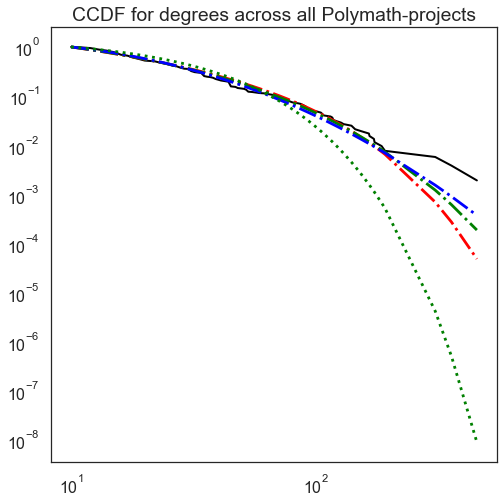

In [34]:
degree_fit = powerlaw.Fit(degree_comments["uDeg T"], discrete=True, xmin=10.0)
print("exponential vs truncated power_law:", degree_fit.distribution_compare('exponential', 'truncated_power_law', normalized_ratio=True))
print("stretched exponential vs truncated power_law:", degree_fit.distribution_compare('stretched_exponential', 'truncated_power_law', normalized_ratio=True))
print("stretched exponential vs exponential:", degree_fit.distribution_compare('stretched_exponential', 'exponential', normalized_ratio=True))
print("lognormal vs stretched exponential:", degree_fit.distribution_compare('lognormal', 'stretched_exponential', normalized_ratio=True))


_, axes = plt.subplots(figsize=(8,8))
degree_fit.plot_ccdf(color='k', linewidth=2, ax=axes)
degree_fit.truncated_power_law.plot_ccdf(color='r', linestyle='-.', ax=axes)
degree_fit.stretched_exponential.plot_ccdf(color='g', linestyle='-.', ax=axes)
degree_fit.lognormal.plot_ccdf(color='b', linestyle='-.', ax=axes)
degree_fit.exponential.plot_ccdf(color='g', linestyle=':', ax=axes)
axes.set_title("CCDF for degrees across all Polymath-projects");

When the degree-distribution can be fitted onto a power-law, the degree-exponent can be used to determine the regime of the network. Here, as we cannot consider the truncated PowerLaw as the best fit for this distribution, we analyse the evolution of the network over time to make this determination, and consider the evolution of maximum degrees and average shortest paths against the size of the network. We have 165 data-points; one for each thread.

In [35]:
%%time
sizes = []
d = []
p_l = []

for i in range(1, len(thread_affiliations.columns)+1):
    if i%10==0:
        print(i)
    this_affil_data = thread_affiliations[thread_affiliations.columns[:i]]
    this_affil_data = this_affil_data[((this_affil_data != 0).T).any()]
    this_affil_network = nx.Graph()
    this_affil_network.add_nodes_from(this_affil_data.index, bipartite=0)
    this_affil_network.add_nodes_from(this_affil_data.columns, bipartite=1)
    for author in this_affil_data.index:
        affiliations = this_affil_data.loc[author]
        this_affil_network.add_weighted_edges_from(
            [(author, thread, affiliations.loc[thread]) for thread in affiliations.index if affiliations.loc[thread] != 0])
        
    #making weight_fun
    this_thread_list = [node for node in this_affil_network.nodes if isinstance(node, int)]
    this_thread_normalizer = Series({i: j for (i, j) in this_affil_network.degree(weight="weight") if i in this_thread_list},
       index=this_thread_list).values
    this_thread_weight_fun = partial(custom_weight_fun, affiliations_list=this_thread_list, normalizer=this_thread_normalizer)
    # projecting nodes
    this_participant_network = bipartite.generic_weighted_projected_graph(this_affil_network,
                                           this_affil_data.index, weight_function=this_thread_weight_fun)
    # adding inverted weights to participant-network from thread-affils for use with betweenness
    inverted_weights = dict()

    for (i, j, attributes) in this_participant_network.edges(data=True):
        inverted_weights[(i, j)] = 1/attributes["weight"]

    nx.set_edge_attributes(this_participant_network, inverted_weights, 'inverted_weight')
    
    size = this_participant_network.number_of_nodes()
    max_degrees = Series(dict(this_participant_network.degree())).max()
    path_l = nx.average_shortest_path_length(this_participant_network)
    sizes.append(size)
    d.append(max_degrees)
    p_l.append(path_l)

evol_data = DataFrame({"N": sizes,
                       "max degree": d,
                       "avg shortest path-length": p_l})

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
CPU times: user 33min 18s, sys: 7.65 s, total: 33min 26s
Wall time: 33min 38s


In [36]:
evol_data["lnln(N)"] = np.log(np.log(evol_data["N"]))
evol_data["ln(N)"] = np.log(evol_data["N"])

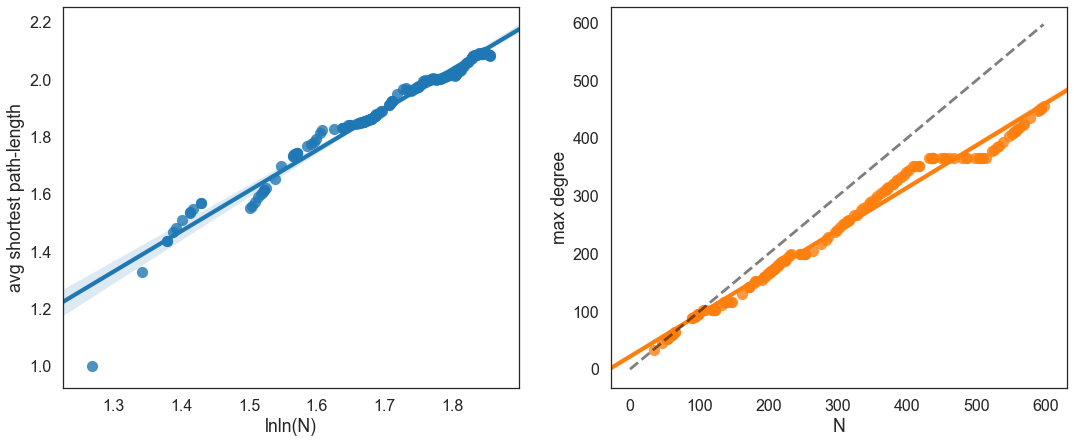

In [37]:
_, (axes1, axes2) = plt.subplots(1, 2, figsize=(18, 7))
sns.regplot(evol_data["lnln(N)"], evol_data["avg shortest path-length"], ax=axes1);
sns.regplot(evol_data["N"], evol_data["max degree"], ax=axes2);
this_lim = evol_data["N"].max()
axes2.plot([0, this_lim], [0, this_lim], "--", color="k", alpha=.5);

The degree-distribution already showed that we have a scale-free network: there is a large difference between the degrees of the largest and smallest nodes. From the fact that the average shortest path-lenght grows linearly in $\ln\ln(N)$, and that the maximum-degree almost keeps track with the number of nodes, we can now conclude that we have an ultra-small network.

Given the still moderate size of the network, the difference between small and ultra-small world networks is of less importance. At this size, the difference in average shortest paths between small and ultra-small world networks remains limited. As it turns out, the average shortest-path $\approx \frac{\ln N}{\ln \mathrm{Mdn}(k)}$, namely: $\frac{\ln(596)}{\ln(18)} \approx 2.21$.

A more concrete insight here is that this network is not in the so-called anomalous regime, where the degree of the largest hub is identical with the size of the network. An examination of the heatmaps at the start of §4 already reveals that this is not the case: there is no single participant who took part in all project (and *a fortiori* in all threads), but the two core participants are sufficient to tied the entire network together. However, we should avoid jumping to the conclusion that the structure of the Polymath-community is entirely determined by those central actors. 

Indeed, we can show that for this network the diameter of the network (the largest distance between two nodes in the network, which is 3 independently of whether we look at joint affiliation of projects or threads) is inevitable given the presence of large hubs.

It is insightful to reflect briefly on the mechanism that generates the specific degree-distribution we find here, as this can inform us about the emergence fof hubs as well as (in this specific case) can also inform us about the specific social role played by the central participants. Traditionally, the powerlaw distributions of the degrees in a network is taken to be caused by a mechanism of *preferential attachment*: if new nodes are more likely to link to already well-connected nodes, then even a small preference for better connected nodes will lead to the emergence of hubs (Barabasi 2016: §5.3). Since we study a network based on joint affiliations, we cannot straightforwardly transpose this analysis to the present case. There are at least two salient differences: first, new as well as already present nodes create links (or reinforce links), and, second, participants do not directly link to other participants, but link instead to projects or threads. In that sense, the ermegence of hubs cannot be the direct result of preferential attachment. But there is an additional complication: participants cannot even freely choose their affiliations. At most stages, the number of available choices are fairly limited. With only one recent exception during Polymath 15 and 16, there is only one project to affiliate to. Additionally, during most projects (with Polymath 1 as a notable exception), there is only one active thread to affiliate to. As such, the "choice" faced by a participant is binary: affiliate to the current option or no affiliation at all. Moreover, every project or thread to affiliate to comes with pre-existing affiliation that have to be taken as a given. These general features are slightly relaxed when we look at more fine-grained affiliations like episodes, but they do not disappear: the discussion will always be happening in a very small number of places. 

This allows us to highlight two features of highly connected nodes:

1. Nodes become "highly connected" because they are omnipresent: they are always or almost always affiliated to the current option. This corresponds to a role for highly connected participants as *available* moderators or leaders.

2. Nodes become "highly connected" because they make the events they are affiliated to more attractive. They increase the chance that other participants will affiliate rather than not to affiliate. This corresponds to a role for highly connected participants as *attractive* moderators or leaders.

The first feature appears incontroversial and agrees with an earlier point we made about central participants: there is no lazy road to becoming a highly central participant; centrality is due to extensive sustained effort. The second feature is potentially problematics, for it may indicate that not every highly active participant may become a central participant, in the sense that only previously attractive participants can create a context in which they can become highly active in the presence of others. Contributing the totality of all comments doesn't, after all, make one highly connected. This only becomes possible if a sufficiently large pool of other contributors are willing to contribute the other 75% of the comments.

This worry connects to broader concern regarding the ability of Polymath to create the open environment it aspires to. We cannot do justice to these aspects here, and therefore can only reitterate the consequences of our two earlier insights: since centrality only comes with effort, it is only within reach of those who can spare that effort; since the potential to spare the effort alons is presumably not sufficient to reach centrality, it may also not be within reach of those who are not already sufficiently attractive.  

An additional caveat, informed by the self-reporting of the participants to Polymath 8 (Polymath 2014), is that much effort remains hidden in the present analysis: even just following without actively contributing requires a substantial investment given the high pace of most of the discussions. 

The present analysis cannot shed light on such practical and institutional obstacles to reaching Polymath-prominence, and cannot either directly reveal something about hidden investments (or, indeed, the hidden returns of Polymath). It can, however, bring something else to the table:

+ It allows us to precisely quantify the centrality of the most prominent participants.
+ It can additionally be used to shed light on the relative centrality of less visible participants (something that one cannot glean by merely reading the threads, but that surfaces by inspecting path-lengths), and can even give indications about the potential of newly emerging hubs (indeed, the largely inconclusive attempts to find sub-communities in the entire Polymath-community revealed that at any point there were apparent "runner-ups" to the two major centres of attraction.)
+ By reasoning explicitly about the mechanisms that generate connections, it adds nuance to how we evaluate the significance of centrality.

## 6. Analysis of Specific Projects

We take a closer look at the fine-structure of the networks associated with specific projects.

Three types of networks for individual projects can be considered:

1. Directed (weighted) networks based on direct interactions.
2. Undirected (weighted) networks based on joint affiliations to episodes.
3. Directed (weighted) networks based on joint affiliations to episodes.


Networks of the first type are directly extracted from the schape of the discussion-threads. In a directed weighted network there is a directed edge with weight $n$ from one participant to another iff there are $n$ comments authored by the first participants that are a direct reply to comments of the second participant.

Networks of the second and third type are extracted from an intermidiate affiliation-network between participants and episodes of intense interaction. Episodes are ordered collections of comments of which we, in view of their timestamps, may presume that they belong together. They are intuitevely part of the same conversation, and there is a reasonable presumption that participants to a given episodes have read all the comments that belong to that episode. We identified the episodes with the help of a clustering algorithm. Specifically, after initial tests with the `MeanShift` algorithm (Comaniciu & Meer 2002), we settled on the use of `DBSCAN` (Ester, Kriegel, Sander & Xu 1996). Both are unsupervised algorithms that have the benefit of not requiring to set a number of clusters in advance, but the latter algorithm also allows one to exlude single isolated data-points (or small numbers of points) from the clustering. This possibility is essential if we want to avoid the unpredictable and uninformative attribution of isolated comments to the closest cluster.

Undirected weighted networks based on the joint affiliation to episodes are defined as follows: there is a undirected edge with weight $n$ between two participants iff the sum of the number of comments of the episodes both are jointly affiliated to is $n$. Here, the individual contributions of the respective participants do not play a role; only the size of the common episodes (a rough measure how much information was echanged in those episodes) matter.

Directed weighted networks based on the joint affiliation to episodes are defined as follows: there is a directed edge with weight $n$ between one participant and another iff the sum of the number of comments contributed by the first participant in the common episodes is equal to $n$. Here, it is the size of the contribution in the common episodes of the source node that determines the weight; we look at how much information flowed from the first participant to the second.

*Note:* These approaches are distinct from those used at the level of project and thread-affiliations. There, we devised a method where only pairs of highly active participants could create strong ties, since the joint affiliation of two barely active participants to a large collection of comments could only indicate a weak connection. In the case of episodes, effective interaction is the norm, and it is the strength of the interaction (the amount of information exchanged or the number of actual interactions) that has to be quantified.

When weights are ignored, the second type of network is just an undirected variant of the third type. As such, it does not encode additional information, and can safely be left out of our analysis. Additionally, even if the third type of network is directed, all its relations are reciprocal (though potentially of a different weight). 

In the remainder, we focus our attention on the third type, and provide a brief comparison of what can be learned from the first and third type to support this choice. Here, we list some more general considerations in favour of the third type:

+ The presence or absence of direct reply-to relations between comments is in general unreliable. Such relations were absent during the first few threads of Polymath 1, and exhibit substantially different patterns throughout later projects.
    + In Polymath 1, for instance, a separate *ad hoc* numbering was used for some time to explicitly and manually flag relations between comments. There relations were used by Cranshaw & Kittur (2011) to construct a comment reference-graph. The absence of such references during the subsequent projects rules out the extension of that approach.
    + A comparison of the shape of the comment-threads in Polymath 4 and 5 reveals a glaring discrepancy. As illustrated by the figures below, the former project has comments of many levels, but the latter has only level-1 and level-2 comments.

+ As a means to track the flow of information between participants, a network extracted from explicit reply-to relations is exceedingly conservative. Taking into account the authors of "nearby comments" turns out to be a reasonable middle-ground between the conservative option and the liberal option of assuming that information is automatically shared with all participants. The latter option can readily be dismissed in view of the reported effort it takes to keep track of the discussion.

+ Modelling information-flow relativee to joint affiliations allows one to model comments as one-to-many communications. By limiting this to small, temporally dense, episodes of interaction, it makes this assumption also realistic.

+ There is evidence that the discussion actually proceeds through such intenser episodes of interaction. There is not only the reported fact that the speed of the discussion is often high, but we also found indications of a diurnal pattern in the timestamps of the comments (see third figure below).

+ More generally, the network obtained on the basis of affiliations to episodes appears to be a reliable guide to the structure of the community of a given project. We provide some evidence in favour of this below. (one type of evidence to consider: do we get easily get a large connected component)

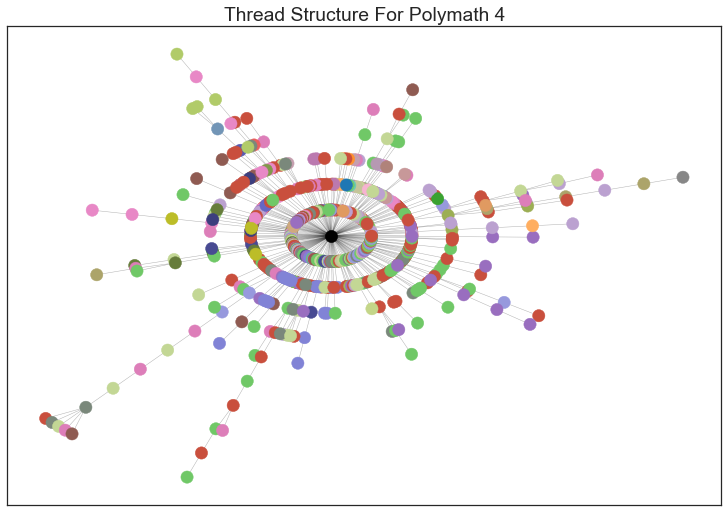

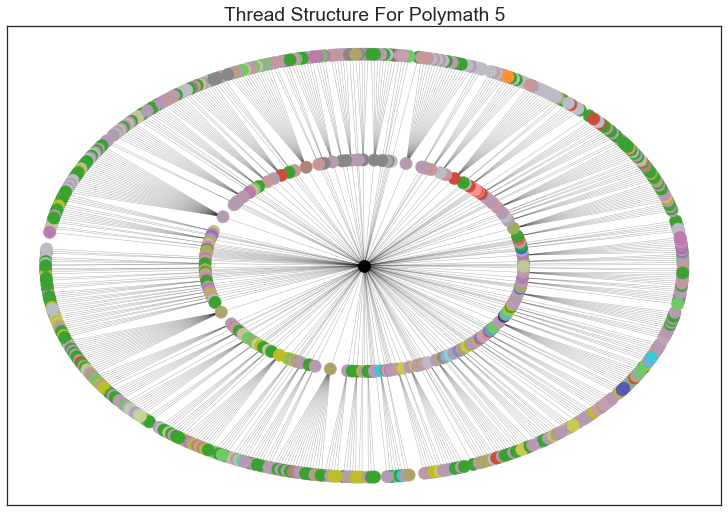

In [38]:
plot_discussion_tree_radial(PM_FRAME, "Polymath 4", stage=6)

plot_discussion_tree_radial(PM_FRAME, "Polymath 5", stage=6)

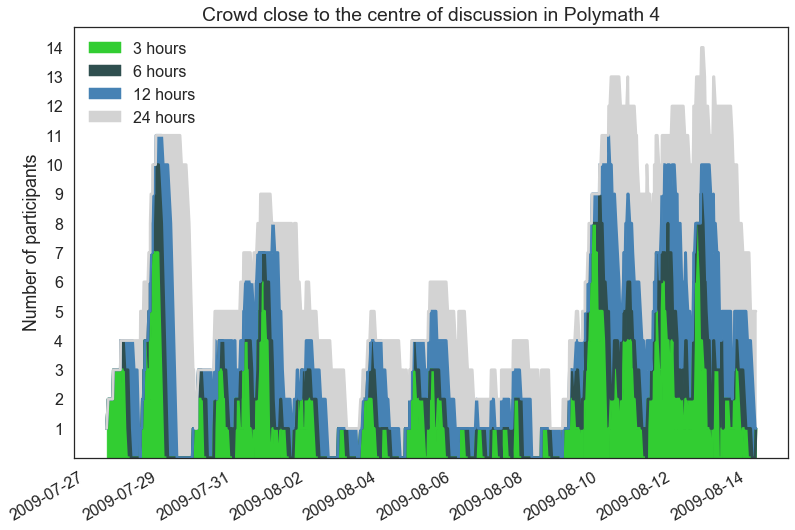

In [39]:
plot_centre_crowd(PM_FRAME, "Polymath 4", stage=1)

### 6.1. Polymath 8



In [40]:
PM8_an, pm8_networks = get_final_networks(PM_FRAME, "Polymath 8")

xxx

We consider the three above-mentioned types of networks for Polymath 8, as well as the largest (weakly) connected component of each of these.

+ The interaction-graph has one large weakly connected component of 93 participants (out of a total of 180), 83 unconnected nodes, and a single (weakly) connected pair.
+ The graphs based on the joint affiliations to episodes have one large (weakly) connected component of 167 participants, only 11 unconnected nodes, and a single (weakly) connected pair.

As a consequence, the analysis of the interaction-graph will not convey any information about almost half of the participants. This seems unwarranted given that 30 of these isolated participants contributed more than 1 comment, and 6 of them contributed more than 5 comments. It also turns out that some of these isolated participants are core participants of the global Polymath community. These considerations suggests that, first, an exclusive focus on the interaction-network leaves out some potentially valuable information about the network, and, second, that it may also misrepresent how information is shared between participants.

In [41]:
pm8_networks['i_graph'].number_of_nodes()

180

In [42]:
Counter([len(x) for x in sorted(nx.weakly_connected_components(pm8_networks['c_dgraph']), key=len)])

Counter({1: 11, 2: 1, 167: 1})

In [112]:
GlobalMetrics_8 = compute_global_metrics(pm8_networks)
GlobalMetrics_8

N  Diameter  Reciprocity  Transitivity  \
Network          Subgraph                                                      
interaction      All nodes          180       NaN     0.546667      0.152058   
                 Largest Component   93       5.0     0.549153      0.152058   
cluster          All nodes          180       NaN          NaN      0.363242   
                 Largest Component  167       4.0          NaN      0.363242   
directed cluster All nodes          180       NaN     1.000000      0.363242   
                 Largest Component  167       4.0     1.000000      0.363242   

                                    Average Clustering  
Network          Subgraph                               
interaction      All nodes                    0.203524  
                 Largest Component            0.393917  
cluster          All nodes                    0.751687  
                 Largest Component            0.810201  
directed cluster All nodes                    0.751687  
                 Largest Component            0.810201

Hubs are nodes with many outgoing links, authorities are nodes with many incoming links. Because we want to take the weight of edges into account, we look at in-degrees and out-degrees and bypass the use of the hits-alogorithm.

In [44]:
Series(dict(pm8_networks["c_dgraph"].in_degree(weight="weight"))).sort_values(ascending = False).head()

Terence Tao             2356
Eytan Paldi             1735
Aubrey de Grey          1442
Gergely Harcos          1355
Andrew V. Sutherland    1293
dtype: int64

In [45]:
get_project_at(PM_FRAME, "Polymath 8", "all threads", -1)["comment_counter (accumulated)"]['Harald Helfgott']

1

In [46]:
for i in nx.weakly_connected_components(pm8_networks["i_graph"]):
    if len(i) == 1:
        for j in i:
            num = get_project_at(PM_FRAME, "Polymath 8", "all threads", -1)["comment_counter (accumulated)"][j]
            if num > 5:
                print(j, num)

Zhi-Wei Sun 20
Koussay 6
Klas Markström 6
Christian Elsholtz 9
Avishay 11
pedant 22


In [47]:
Series(dict(pm8_networks["c_dgraph"].out_degree(weight="weight"))).sort_values(ascending = False).head()

Terence Tao             5078
Eytan Paldi             3278
Andrew V. Sutherland    3113
Gergely Harcos          1897
Pace Nielsen            1577
dtype: int64

When we look at path-lengths, we first note that even though the diameter of the network is 4, the vast majority of all participants are within a distance of at most 2 of each other. In addition, we find that for the entire project, there is an extremely small group of participants (only 6) that are very close (a distance of 1) to the majority of all participants. This suggests that we can characterise this project-community as being consistuted of a small core and a larger but not very distant periphery.

In [48]:
pm8_path_data = compute_path_data(pm8_networks["c_dgraph_core"])

In [49]:
central_given_path_lenghts(pm8_path_data)

Central participants:  6


0      1     2    3    4
Andrew V. Sutherland  1.0   89.0  76.0  1.0  0.0
Aubrey de Grey        1.0   84.0  81.0  1.0  0.0
Eytan Paldi           1.0  129.0  36.0  1.0  0.0
Gergely Harcos        1.0  110.0  56.0  0.0  0.0
Pace Nielsen          1.0   83.0  82.0  1.0  0.0
Terence Tao           1.0  156.0  10.0  0.0  0.0

In [50]:
central_given_path_lenghts(pm8_path_data, thresh=2).head()

Central participants:  166


0     1      2     3    4
Alastair Irving  1.0  28.0  137.0   1.0  0.0
Amancio Perez    1.0   6.0  141.0  18.0  1.0
Américo Tavares  1.0  22.0  139.0   5.0  0.0
Andre            1.0   6.0  157.0   3.0  0.0
Andre K.         1.0  12.0  152.0   2.0  0.0

Given the still relative small scale of this network, the distinction between small-world and ultra-small world regimes cannot be drawn. We note, however, that the maximum-degree of the network stays follows very closely to the size of the network.

In [51]:
%%time
pm8_evol_data, pm8_top = evolution_over_time(PM_FRAME, "Polymath 8")

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCPU times: user 1min 26s, sys: 185 ms, total: 1min 27s
Wall time: 1min 27s


/Users/patrickallo/Dropbox/_RESEARCH/Current Research/MathPracModelling/code/pm/notebook_helper/access_funs.py:159: RuntimeWarning: divide by zero encountered in log
  np.log(evol_data["N* (interaction)"]))


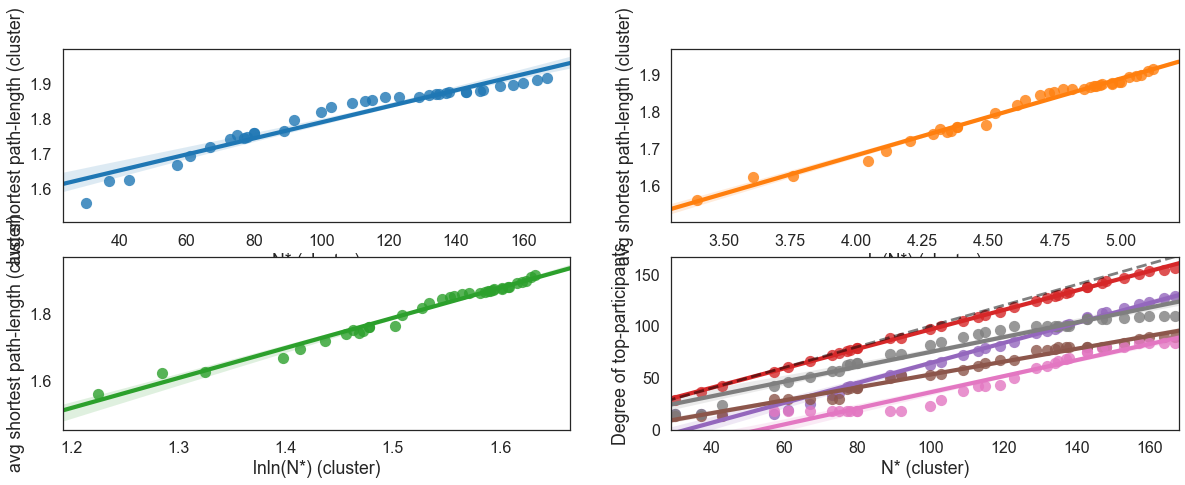

In [52]:
plot_evolution_network(pm8_evol_data, pm8_top, graph_type="cluster", drop_first=True)

To understand how a network with these specific features emerges, we construct networks based on the joint affiliation to episodes for each individual discussion-thread (limited to participants present in at least two threads). The resulting networks are very highly connected (the average transitvity is .88), and substantially exceeds the transitivity of the overall network for Polymath 8 (.36) for all but one thread. This shows that the project-level network is best seen as the aggregation of highly connected networks that do not share several, but not all their participants.

A visual inspection of these networks reveals that there are

+ a small number of almost omnipresent central participants,
+ a larger group of more occasional participants, but
+ notably also several highly present participants that sit between these two extremes.

In [113]:
indiv_network_data_8 = assemble_indiv_networks(PM_FRAME, "Polymath 8", "research threads")

pm8_top = PM8_an.author_frame['total comments'].drop("Anonymous").nlargest(10).index.tolist()

xxxxxxxxxxxxxxxxxxx

In [115]:
avg_clustering = []
trans = []
for network in indiv_network_data_8["networks"]:
    avg_clustering.append(nx.average_clustering(network.to_undirected()))
    trans.append(nx.transitivity(network))

In [116]:
Series(trans).describe()

count    28.000000
mean      0.875620
std       0.167955
min       0.264706
25%       0.811203
50%       0.926565
75%       1.000000
max       1.000000
dtype: float64

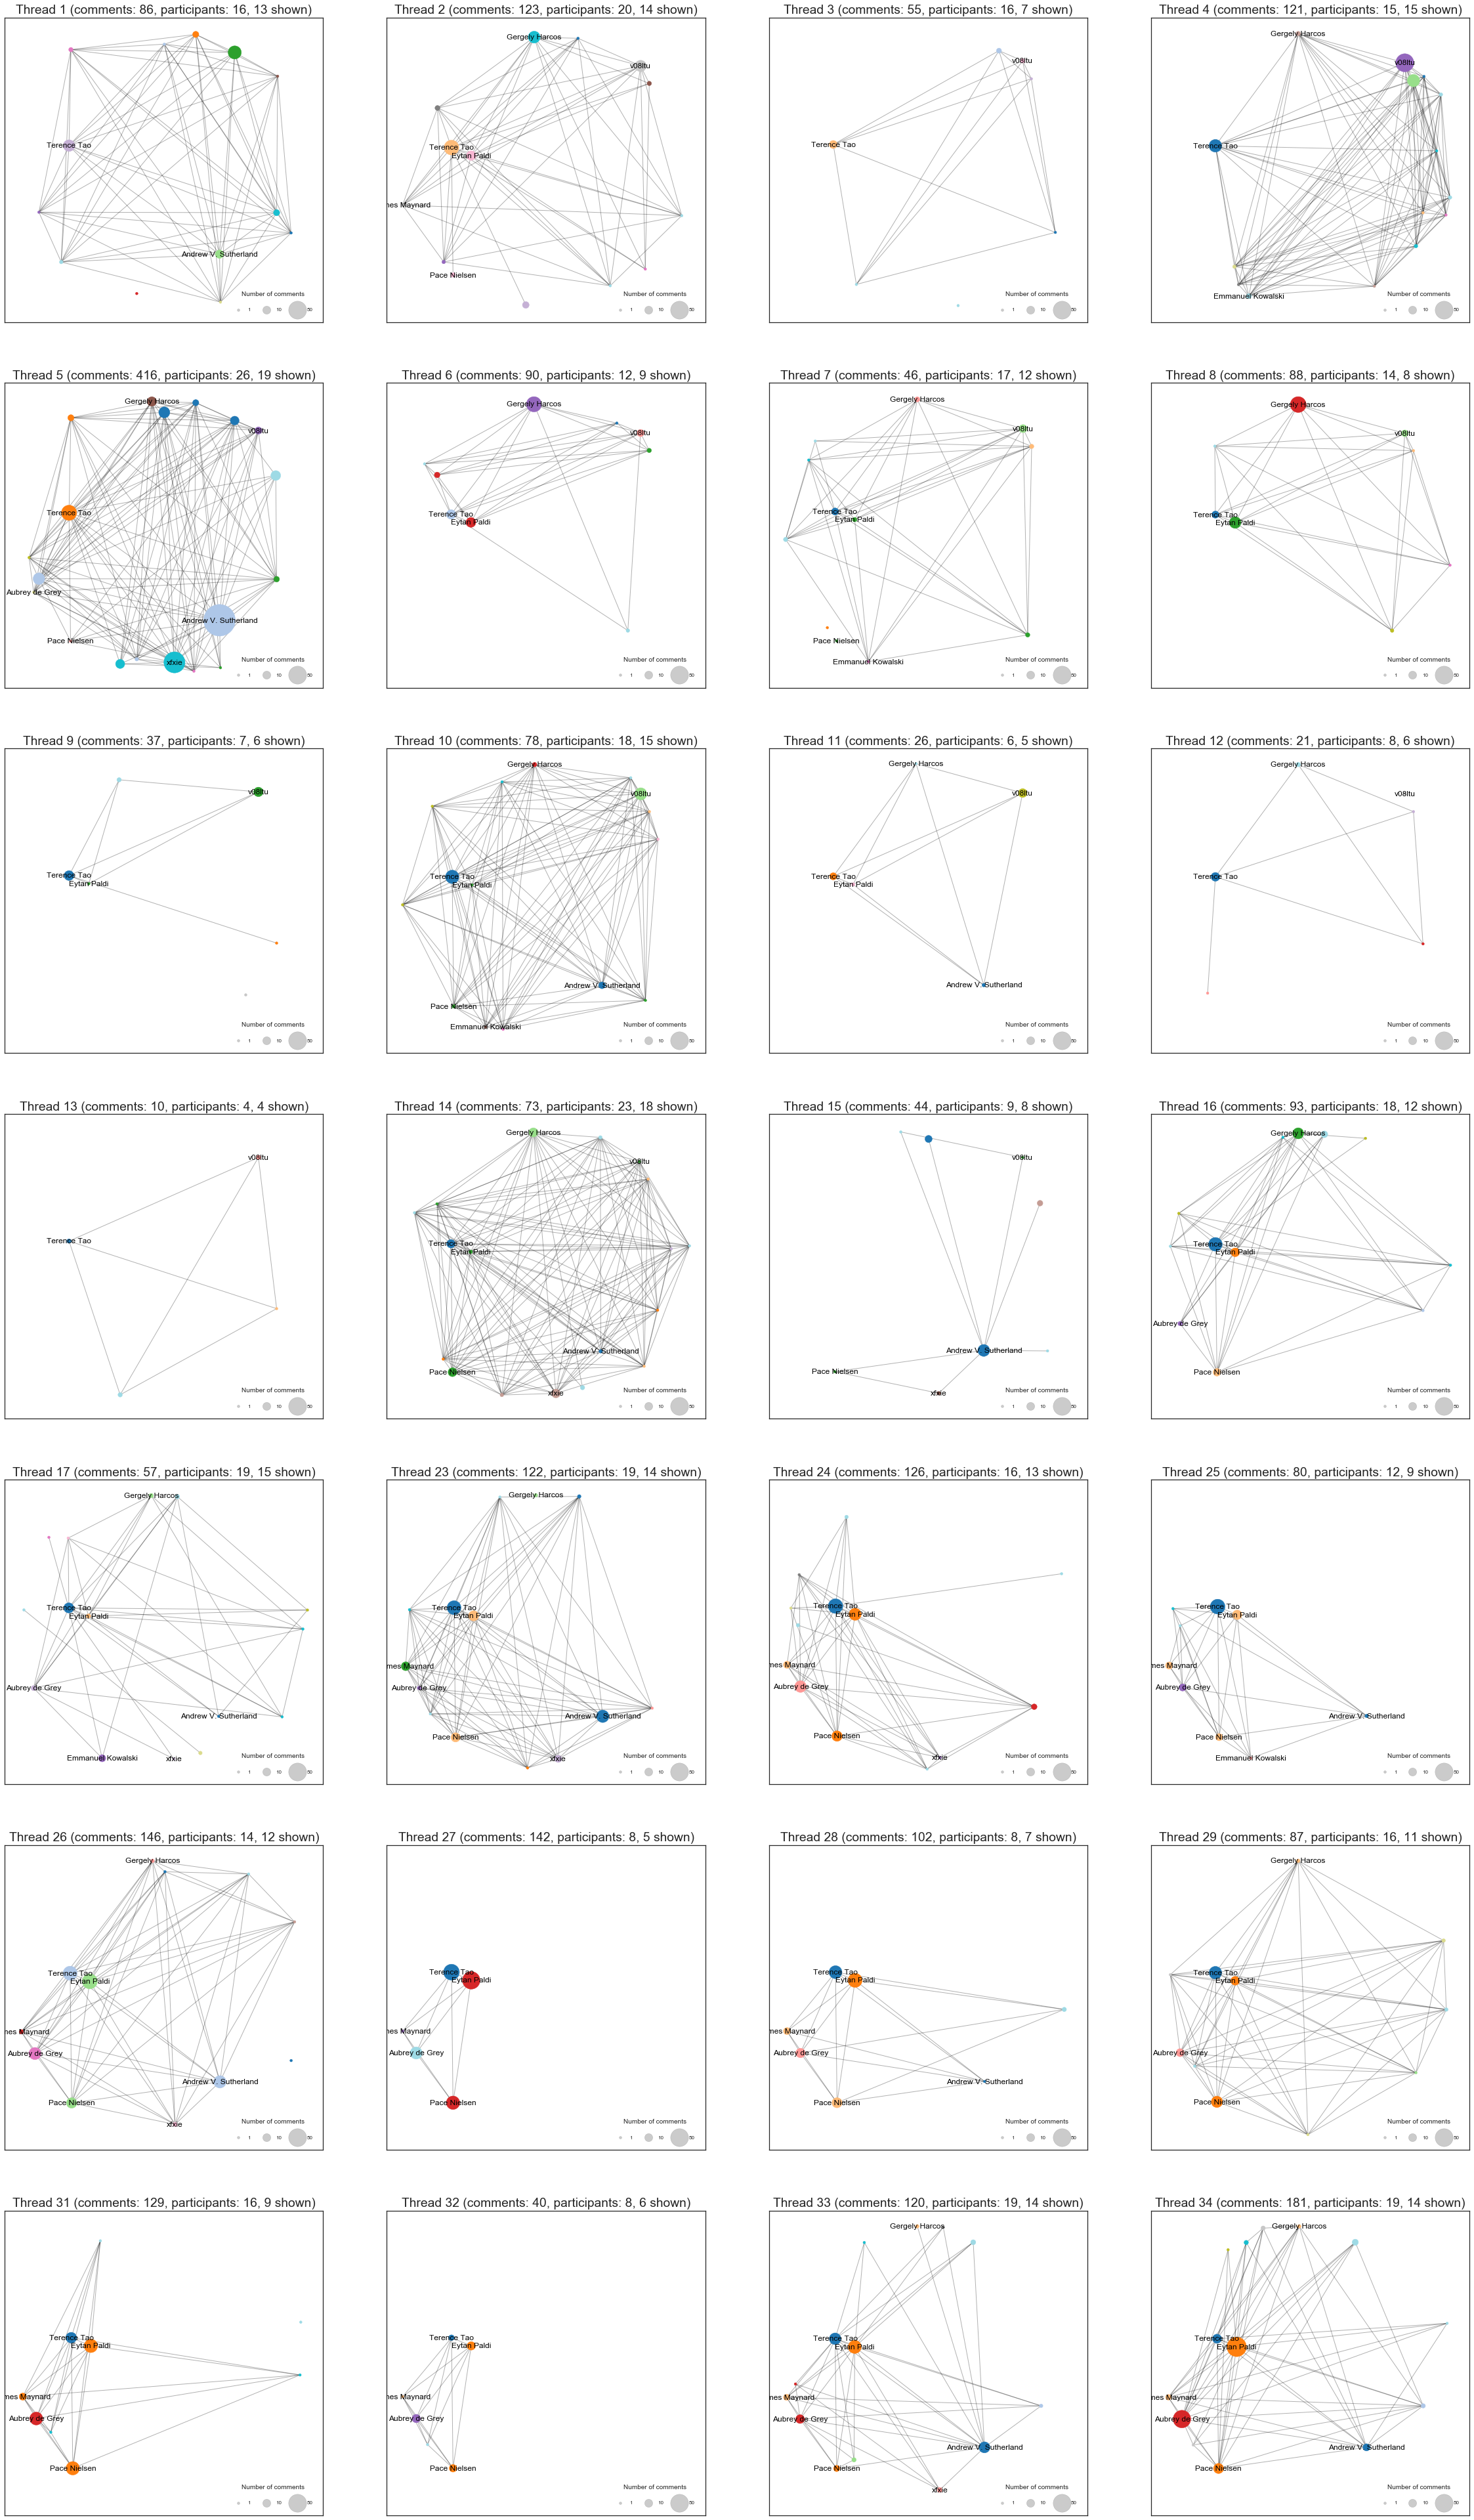

In [117]:
draw_indiv_networks(PM_FRAME, "Polymath 8", pm8_networks["c_dgraph"], **indiv_network_data_8, show_labels=pm8_top, k=12)

### 6.2 Polymath 4

In [56]:
PM4_an, pm4_networks = get_final_networks(PM_FRAME, "Polymath 4")

xxx

In [57]:
Counter([len(x) for x in sorted(nx.weakly_connected_components(pm4_networks['c_dgraph']), key=len)])

Counter({1: 7, 2: 1, 48: 1})

In [118]:
GlobalMetrics_4 = compute_global_metrics(pm4_networks)
GlobalMetrics_4

N  Diameter  Reciprocity  Transitivity  \
Network          Subgraph                                                     
interaction      All nodes          57       NaN     0.554054      0.349367   
                 Largest Component  46       5.0     0.554054      0.349367   
cluster          All nodes          57       NaN          NaN      0.749650   
                 Largest Component  48       2.0          NaN      0.749650   
directed cluster All nodes          57       NaN     1.000000      0.749650   
                 Largest Component  48       2.0     1.000000      0.749650   

                                    Average Clustering  
Network          Subgraph                               
interaction      All nodes                    0.269666  
                 Largest Component            0.334152  
cluster          All nodes                    0.731067  
                 Largest Component            0.868142  
directed cluster All nodes                    0.731067  
                 Largest Component            0.868142

In [59]:
pm4_path_data = compute_path_data(pm4_networks["c_dgraph_core"])

In [60]:
central_given_path_lenghts(pm4_path_data)

Central participants:  13


0     1     2
Emmanuel Kowalski  1.0  43.0   4.0
Ernie Croot        1.0  35.0  12.0
Gil Kalai          1.0  45.0   2.0
Harrison           1.0  28.0  19.0
Jason Dyer         1.0  27.0  20.0
Kristal Cantwell   1.0  43.0   4.0
Lior Silberman     1.0  27.0  20.0
Mark Lewko         1.0  27.0  20.0
Michael Peake      1.0  24.0  23.0
Terence Tao        1.0  47.0   0.0
Thomas Sauvaget    1.0  24.0  23.0
Timothy Gowers     1.0  40.0   7.0
luca               1.0  27.0  20.0

In [61]:
%%time
pm4_evol_data, pm4_top = evolution_over_time(PM_FRAME, "Polymath 4")

xxxxxxxxxxxxxxCPU times: user 4.81 s, sys: 124 ms, total: 4.93 s
Wall time: 5.57 s


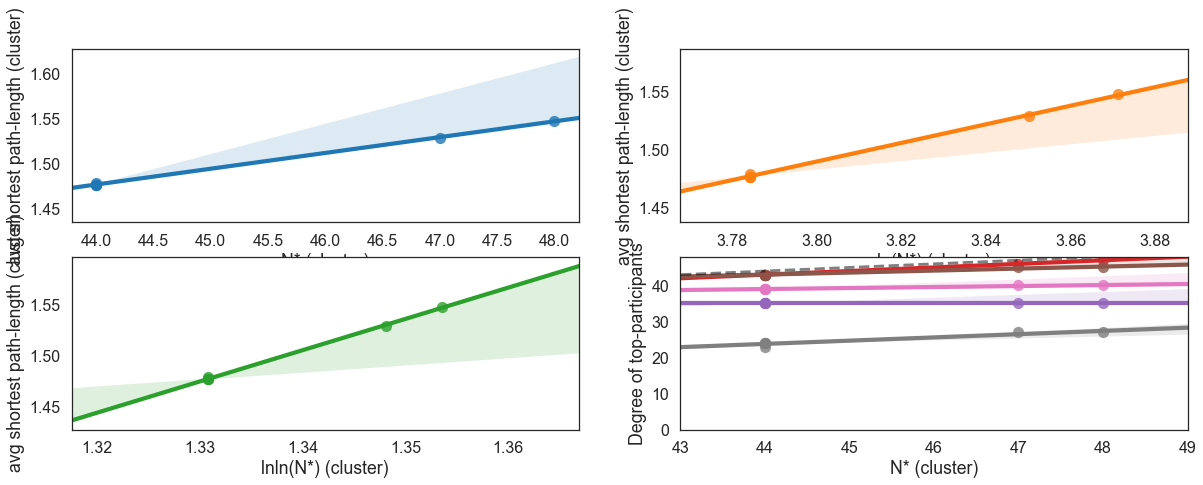

In [62]:
plot_evolution_network(pm4_evol_data, pm4_top, graph_type="cluster", drop_first=True)

In [119]:
indiv_network_data_4 = assemble_indiv_networks(PM_FRAME, "Polymath 4", "research threads", thresh=1)

pm4_top = PM4_an.author_frame['total comments'].drop("Anonymous").nlargest(10).index.tolist()

xxxx

In [120]:
for network in indiv_network_data_4["networks"]:
    print(nx.transitivity(network))

0.7869897959183674
1.0
0.9095022624434389
0.7021276595744681
0


The situation here is different from that in Polymath 8: here, the network associated with the entire project is better seen as the aggregation of very minor variations of the same collaboration.

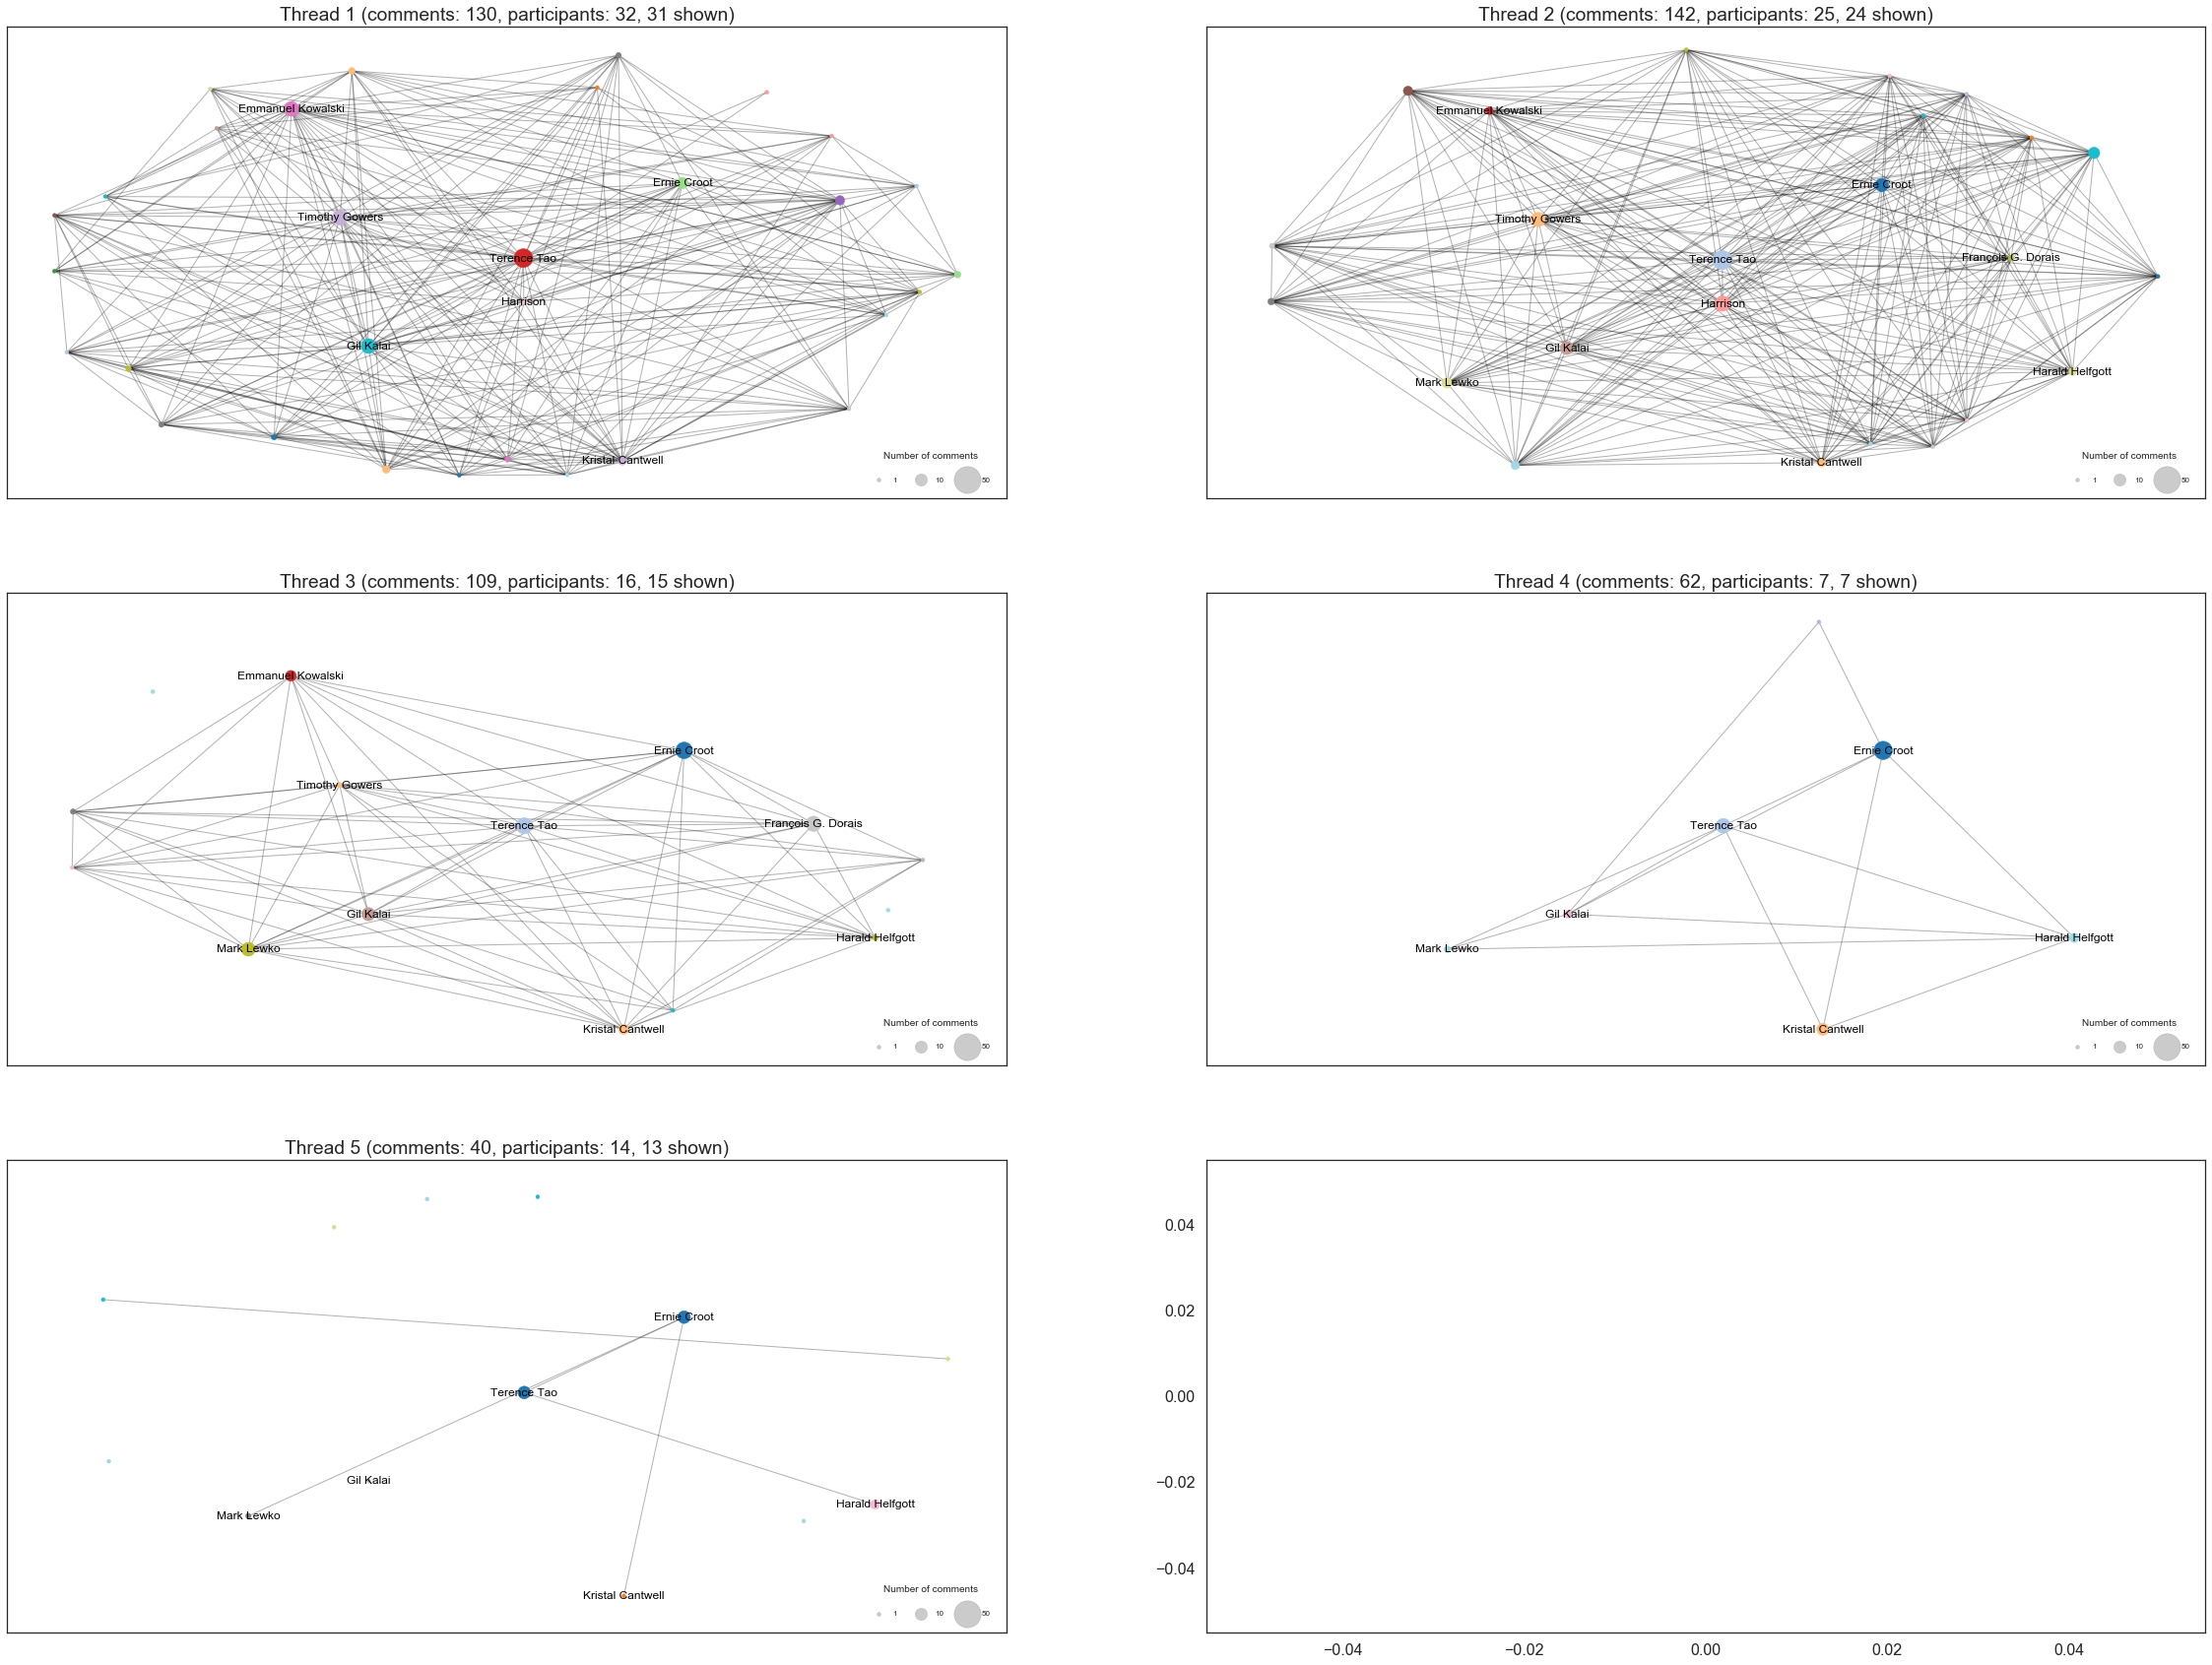

In [121]:
draw_indiv_networks(PM_FRAME, "Polymath 4", pm4_networks["c_dgraph"], **indiv_network_data_4,
                    show_labels=pm4_top, k=7, cols=2)

### 6.3. Polymath 16

In [65]:
PM16_an, pm16_networks = get_final_networks(PM_FRAME, "Polymath 16")

xxx

In [122]:
GlobalMetrics_16 = compute_global_metrics(pm16_networks)
GlobalMetrics_16

N  Diameter  Reciprocity  Transitivity  \
Network          Subgraph                                                     
interaction      All nodes          54       NaN     0.428571      0.085106   
                 Largest Component  15       4.0     0.444444      0.085106   
cluster          All nodes          54       NaN          NaN      0.668912   
                 Largest Component  51       3.0          NaN      0.668912   
directed cluster All nodes          54       NaN     1.000000      0.668912   
                 Largest Component  51       3.0     1.000000      0.668912   

                                    Average Clustering  
Network          Subgraph                               
interaction      All nodes                    0.044753  
                 Largest Component            0.161111  
cluster          All nodes                    0.801738  
                 Largest Component            0.848899  
directed cluster All nodes                    0.801738  
                 Largest Component            0.848899

In [67]:
pm16_path_data = compute_path_data(pm16_networks["c_dgraph_core"])

In [68]:
central_given_path_lenghts(pm16_path_data)

Central participants:  19


0     1     2    3
Aubrey de Grey     1.0  44.0   6.0  0.0
Bernhard Hockertz  1.0  27.0  23.0  0.0
Boris              1.0  37.0  13.0  0.0
David Speyer       1.0  31.0  19.0  0.0
Dustin G. Mixon    1.0  44.0   6.0  0.0
Dömötör Pálvölgyi  1.0  33.0  17.0  0.0
Gil Kalai          1.0  36.0  14.0  0.0
Hans Parshall      1.0  30.0  20.0  0.0
Lior Silberman     1.0  28.0  22.0  0.0
Marijn Heule       1.0  37.0  13.0  0.0
Matthew Kahle      1.0  28.0  22.0  0.0
Michael Ruxton     1.0  27.0  23.0  0.0
Nazgand            1.0  26.0  24.0  0.0
Pace Nielsen       1.0  30.0  20.0  0.0
Philip Gibbs       1.0  31.0  19.0  0.0
Tamás Hubai        1.0  28.0  22.0  0.0
Terence Tao        1.0  36.0  14.0  0.0
Varga              1.0  30.0  20.0  0.0
dsp                1.0  28.0  22.0  0.0

In [69]:
%%time
pm16_evol_data, pm16_top = evolution_over_time(PM_FRAME, "Polymath 16")

xxxxxxxxxxxxCPU times: user 2.47 s, sys: 53.6 ms, total: 2.52 s
Wall time: 2.62 s


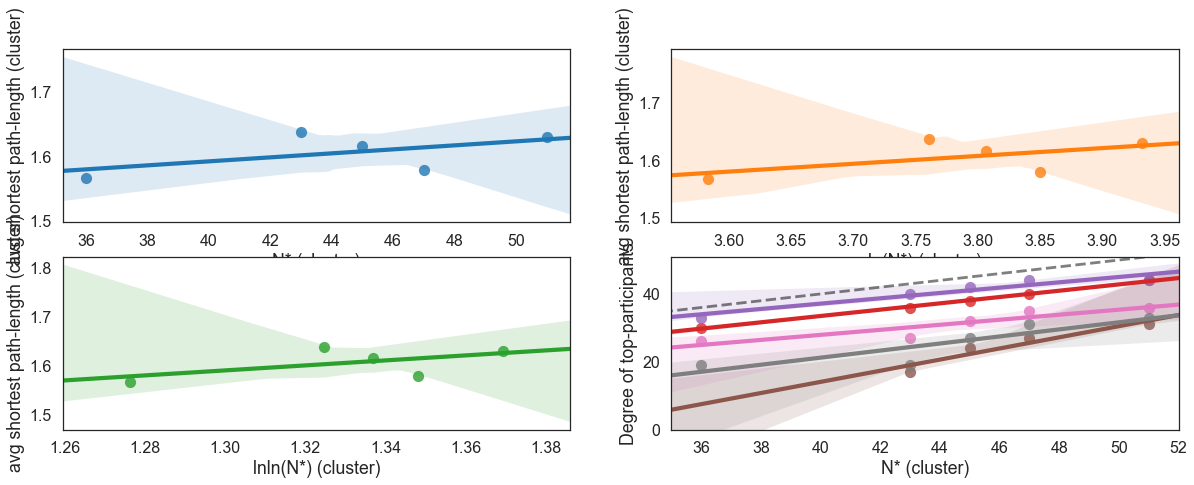

In [70]:
plot_evolution_network(pm16_evol_data, pm16_top, graph_type="cluster", drop_first=True)

Here, we see yet another type of evolution, where the collaboration network appears to shrink such as to re-center on the core participants.

In [123]:
indiv_network_data_16 = assemble_indiv_networks(PM_FRAME, "Polymath 16", "research threads", thresh=1)

pm16_top = PM16_an.author_frame['total comments'].drop("Anonymous").nlargest(10).index.tolist()

In [124]:
for network in indiv_network_data_16["networks"]:
    print(nx.transitivity(network))

0.7884615384615384
0.7206863679694948
1.0
1.0
0.758800521512386


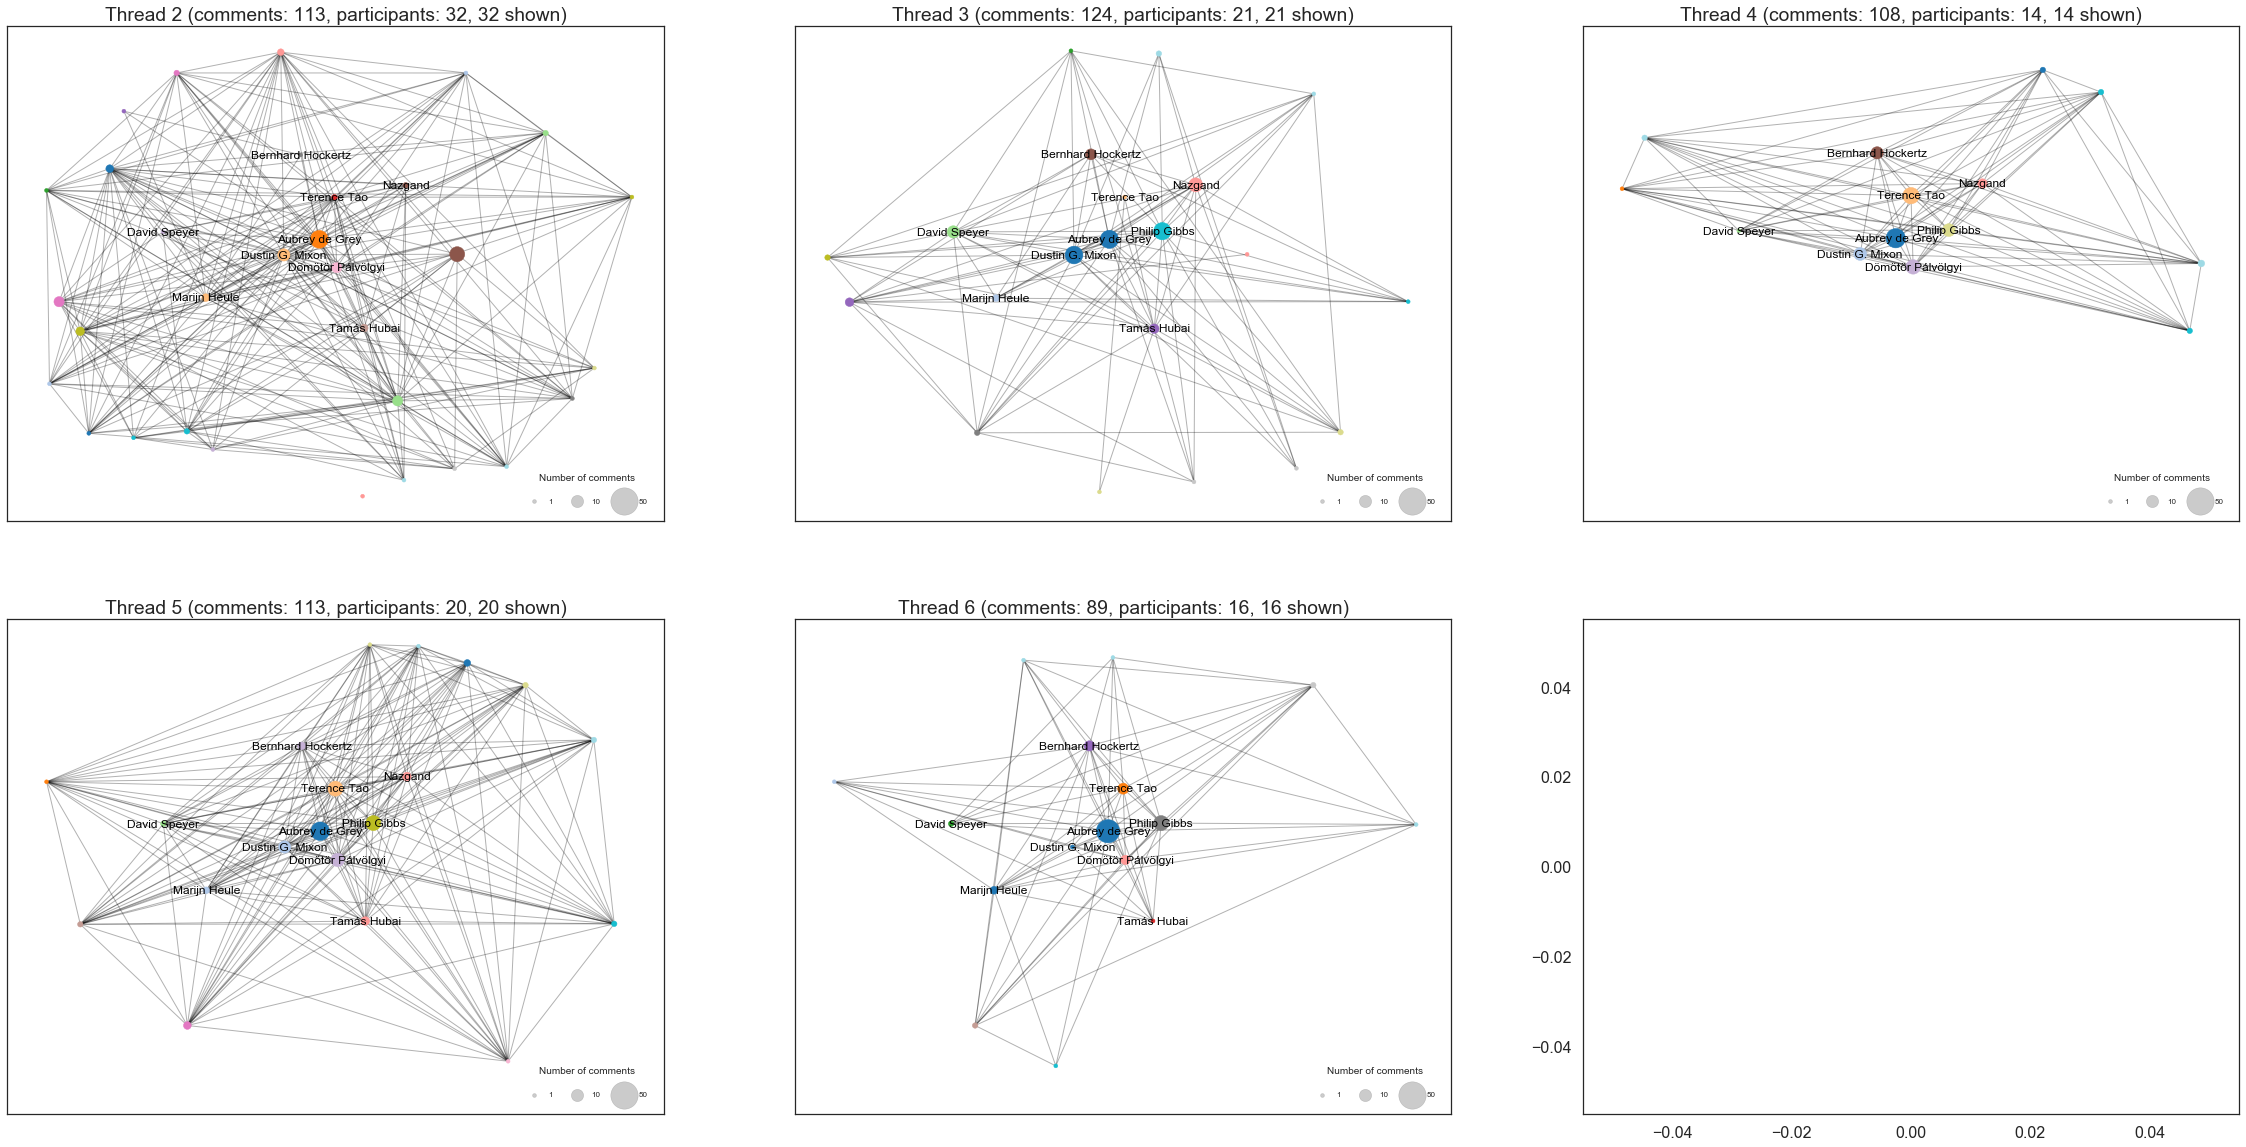

In [125]:
draw_indiv_networks(PM_FRAME, "Polymath 16", pm16_networks["c_dgraph"], **indiv_network_data_16,
                    show_labels=pm16_top, k=5, cols=3)